<a href="https://colab.research.google.com/github/wiltacca/Portfolio/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [3]:
# Install essential libraries

! pip install emoji

     |████████████████████████████████| 175 kB 4.1 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=4d279e8b33fc0533440fb9626fe9b0fea8b0c72d2f4b7e10beff2bb02114c527
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [4]:
# Import the Required Packages

from tensorflow import keras
print('keras: ', keras.__version__)

import tensorflow as tf
# with tf.device('/device:GPU:0') ---> train model fit with GPU

from tensorflow.keras import models, layers, optimizers, regularizers
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, SimpleRNN, LSTM, GRU, Dropout
from tensorflow.keras.utils import to_categorical, plot_model

from sklearn.model_selection import train_test_split

from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import nltk

import os
import numpy as np
import pandas as pd
import time
import string
import emoji

import matplotlib.pyplot as plt
%matplotlib inline

keras:  2.8.0


## Step 1 – Data Loading and Processing

### 1.1 Data Loading

In [5]:
# Read a comma-separated values (csv) file into DataFrame.

url = 'https://raw.githubusercontent.com/wiltacca/Portfolio/main/Datasets/disneyplus_reviews.csv'

df = pd.read_csv(url, header = None)

# Print the data.
df

,0,1
0,Great content but the worst/frustrating app I ...,1
1,Great update. Now I can't even load the App. E...,1
2,"Don't waste your money, they have almost nothi...",1
3,the cast function literally does not work,1
4,Ive been trying to cancel my subscription and ...,1
...,...,...
54995,love it,5
54996,"Wonderful, beautimous entertainment.",5
54997,very good,5
54998,absolutely love this,5


In [ ]:
# Print a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       55000 non-null  object
 1   1       55000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 859.5+ KB


In [ ]:
# Store texts and labels.
texts = (df[0]) # Features input 
labels = (df[1]) # Target output

### 1.2 Data Processing

In [ ]:
# Covert all texts to lower case.
texts = texts.astype(str).str.lower()

In [ ]:
# Inspect texts are in lower case.
texts

0        great content but the worst/frustrating app i ...
1        great update. now i can't even load the app. e...
2        don't waste your money, they have almost nothi...
3                the cast function literally does not work
4        ive been trying to cancel my subscription and ...
                               ...                        
54995                                              love it
54996                 wonderful, beautimous entertainment.
54997                                            very good
54998                                 absolutely love this
54999    great app, easy to navigate. all the disney fi...
Name: 0, Length: 55000, dtype: object

In [ ]:
# Create a function to check if a single codepoint is an emoji codepoint by checking if it is contained in emoji.UNICODE_EMOJI.
def extract_emojis(s):
    return ''.join((' '+c+' ') if c in emoji.UNICODE_EMOJI['en'] else c for c in s)

In [ ]:
# emoji.demojize() to transform the emoji icon into the text code.
texts = texts.apply(emoji.demojize)

In [ ]:
# Inspect texts without emoji.
texts.tail(10)

54990    i like the disney movies they are fun and they...
54991    this is a very great app i love disney everyon...
54992    it is a great app because it as almost all the...
54993    disney+ is literally the best thing! all of th...
54994                                              love it
54995                                              love it
54996                 wonderful, beautimous entertainment.
54997                                            very good
54998                                 absolutely love this
54999    great app, easy to navigate. all the disney fi...
Name: 0, dtype: object

In [ ]:
# Remove the punctuation using the build-in string module.
texts = texts.str.replace('[{}]'.format(string.punctuation), "", regex=True)

In [ ]:
# Inspect texts without punctuation.
texts

0        great content but the worstfrustrating app i h...
1        great update now i cant even load the app erro...
2        dont waste your money they have almost nothing...
3                the cast function literally does not work
4        ive been trying to cancel my subscription and ...
                               ...                        
54995                                              love it
54996                   wonderful beautimous entertainment
54997                                            very good
54998                                 absolutely love this
54999    great app easy to navigate all the disney film...
Name: 0, Length: 55000, dtype: object

In [ ]:
# Download stopwords from nltk package.
#nltk.download('stopwords')

In [ ]:
# Let create a function that splits a string into a list of words, then removes the
# stop words from the list if the words are within NLTK's English stop words list,
# and finally concatenates the remaining words back into a string.
#def remove_stopwords(text):
    #stop = set(stopwords.words('english')) # from above nltk.download('stopwords')
    #text = [word for word in text.split() if word not in stop] # tokenize into indivdiual word
    #text = ' '.join(x for x in text) # join with spacing
    #return text

In [ ]:
# let use the function created from above to remove stop words from the texts.
#texts = texts.apply(remove_stopwords)

In [ ]:
# let stem the words in the data using SnowballStemmer from NLTK.
# Let create an instance of SnowballStemer for the English language.
#stemmer = SnowballStemmer("english")

In [ ]:
# Let create a function that splits a string into a list of words, then applies stemmer to 
# each word, and finally concatenates the stemmed word list back into a string.
#def stemm_words(text):
    #text = [stemmer.stem(word) for word in text.split()] # tokenize into indivdiual word
    #text = ' '.join(x for x in text) # join with spacing
    #return text

In [ ]:
# Let use the function we created above to stem the words in the data.
#texts = texts.apply(stemm_words)

In [ ]:
# Set the parameters (hyperparamters tuning) by defining tokenizing and padding parameters.
maxlen = 20  # Cut reviews after 20 words
max_words = 15000  # Only consider the top 15,000 words (vocabulary) in the dataset (dictionary)
training_samples = 55000  # Training on 55000 samples
validation_samples = 55000  # Validating on 55000 samples
embedding_dim = 5 #  Embedding dimensions
oov_tok = '<OOV>' # Out of vocabulary token
epochs_size = 100
epoch = 100

# Have't used yet!
#trunc_type='post'
#padding_type='post'

In [ ]:
# Convert the content and scores into numeric tensors.
tokenizer = Tokenizer(num_words=max_words, oov_token = oov_tok) # num_words: the maximum number of words to keep based on word frequency + out of vocabulary token.
tokenizer.fit_on_texts(texts) # Train tokenizer on the texts sentences

# Create sequences using tokenizer.
sequences = tokenizer.texts_to_sequences(texts) # Convert tokenizer into sequences

# Store word index for the words in the sentences.
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# Pad sequences.
data = pad_sequences(sequences, maxlen=maxlen)

# Convert the lables input to an array.
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Shuffle the data, since started from data where sample are ordered (rating 1,2,3,4,5).
indices = np.arange(data.shape[0])
np.random.shuffle(indices) # Perform shuffle
data = data[indices] # Map back after shuffle
labels = labels[indices] # Map back after shuffle

# One-hot encoding the labels (converts a class vector [integers] to binary class matrix).
y_temp = to_categorical(labels-1) # labels-1 to_categorical will create one-hot encoding starting from 0 instead.

# Define X, y split.
X = data[:training_samples]
y = y_temp[:validation_samples]

Found 29031 unique tokens.
Shape of data tensor: (55000, 20)
Shape of label tensor: (55000,)


### 1.3 Data Sampling

In [ ]:
# Split the X & y into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Note: Removed target variable used for prediction - NEVER include in training set!

# X ---> X_train, X_test:
# X_train = 80% of independent variables use to train the model.
# X_test = 20% of independent variables use to make prediction to test model's accuracy.

# y---> y_train, y_test:
# y_train = Dependent variable to be predicted by model (Which is category lobels against independent variables).
# y_test = Category labels for test data to test accuracy between actual & predicted categories.

# Inspect the dimensionality of the DataFrame.
print(X_train.shape, y_train.shape) 
print(X_test.shape, y_test.shape)

(44000, 20) (44000, 5)
(11000, 20) (11000, 5)


In [ ]:
# Inspect number of words in one sequence and its length.
print(X_train[0])
print(len(X_train[0]))

[   0    0    0    0    0    0    0   38 3019    3    8  322   48  664
  135  866   83  473   13   56]
20


## Step 2 – Develop a Sentiment Analysis Model

### Baseline Model #1: Embedding + Flatten + Dense Layers

In [ ]:
# Build the model.
model1 = Sequential()

# The Embedding layer takes at least two arguments:
# 1 (MUST). the number of possible tokens, here max_features (i.e. the number of word index which is 15,000 words);
# 2 (MUST). the dimensionality of the embedding;
# 3 (Optional). specify the maximum input length to the Embedding layer so that can later flatten the embedded inputs.
model1.add(Embedding(max_words, embedding_dim, input_length=maxlen)) # Receive word embedding as input

# After the Embedding layer, the activations have shape `(samples, embedding_dim, maxlen)`
# Let flatten the 3D tensor of embeddings into a 2D tensor of shape `(samples, embedding_dim * maxlen)`
model1.add(Flatten())

# Add the classifier on top.
model1.add(Dense(5, activation='softmax')) # Output dense layer.

# Let compile the model using RMSprop as optimizer.
model1.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['acc']) 

# Print a useful summary of the model & check total and trainable params.
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 5)             75000     
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 5)                 505       
                                                                 
Total params: 75,505
Trainable params: 75,505
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model on GPU & record its total time in second.
with tf.device('/device:GPU:0'):
    start = time.time()
    history1 = model1.fit(X_train, y_train,
                        epochs=epoch,
                        batch_size=epochs_size,
                        validation_data= (X_test, y_test))
    print("Total time: ", time.time() - start, "seconds")

Epoch 1/100
440/440 [==============================] - 1s 2ms/step - loss: 1.4898 - acc: 0.3245 - val_loss: 1.3984 - val_acc: 0.3682
Epoch 2/100
440/440 [==============================] - 1s 2ms/step - loss: 1.3232 - acc: 0.4210 - val_loss: 1.2763 - val_acc: 0.4495
Epoch 3/100
440/440 [==============================] - 1s 1ms/step - loss: 1.2193 - acc: 0.4799 - val_loss: 1.2122 - val_acc: 0.4789
Epoch 4/100
440/440 [==============================] - 1s 2ms/step - loss: 1.1661 - acc: 0.5048 - val_loss: 1.1839 - val_acc: 0.4935
Epoch 5/100
440/440 [==============================] - 1s 1ms/step - loss: 1.1358 - acc: 0.5207 - val_loss: 1.1697 - val_acc: 0.5014
Epoch 6/100
440/440 [==============================] - 1s 2ms/step - loss: 1.1143 - acc: 0.5325 - val_loss: 1.1620 - val_acc: 0.50280s - loss: 1.1131 - acc: 0.5 - ETA: 0s - loss: 1.1146 - acc: 0.5
Epoch 7/100
440/440 [==============================] - 1s 2ms/step - loss: 1.0974 - acc: 0.5426 - val_loss: 1.1572 - val_acc: 0.5060
Epoch

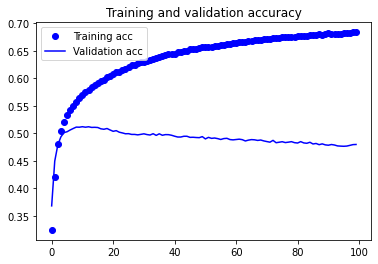

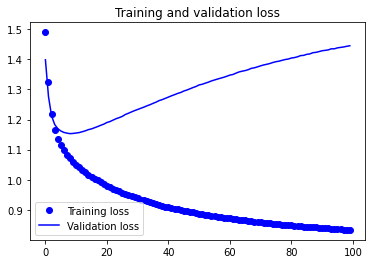

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores.
acc = history1.history['acc']
val_acc = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

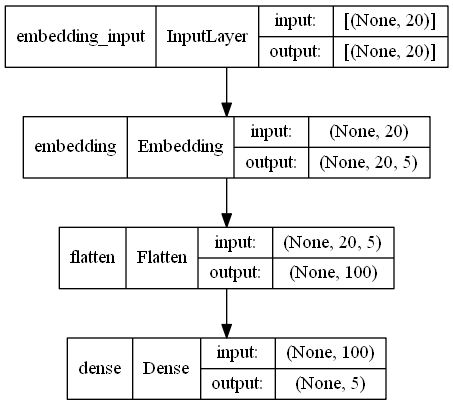

In [ ]:
# Converts a Keras model to dot format and save to a file.
plot_model(model1, show_shapes = True, to_file='model1.png')

In [ ]:
# Save the Model.
model1.save('text_model_1.h5')

### Model #2: Pre-Trained GloVe Word Embeddings (Freeze Pre-Trained Embedding Layer)


Head to `https://github.com/stanfordnlp/GloVe`and download the pre-computed embeddings from 2014 English Wikipedia. It's a 822MB zip file named `glove.6B.zip`, containing multiple txt files with different dimension of embeddings (50, 100, 200 and 300). Let use `glove.6B.50b.txt` for embedding, i.e. convert each word index into a vector of 100 elements / numbers. 

In [ ]:
# File size is huge and unable to upload in Github
glove_dir = 'C:/Users/wilt7/Jypyter/NP Deep Learning/Assignment2/Problem 1'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.50d.txt'), encoding="utf8")

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400001 word vectors.


Now let build an embedding matrix that is able to load into an `Embedding` layer. It must be a matrix of shape `(max_words, embedding_dim)`, where each entry `i` contains the `embedding_dim`-dimensional vector for the word of index `i` in our reference word index (built during tokenization). Note that the index `0` is not supposed to stand for any word or token -- it's a placeholder.

In [ ]:
embedding_dim1 = 50 # Dimension of embeddings is 50

embedding_matrix = np.zeros((max_words, embedding_dim1)) # max_words 15,000, embedding_dim 50

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word) # From above embeddings_index 
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [ ]:
# Print the embedding matrix.
print(embedding_matrix)
print(len(embedding_matrix)) # max_words 15,000
print(len(embedding_matrix[0])) # embedding_dim 50

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.41800001  0.24968    -0.41242    ... -0.18411    -0.11514
  -0.78580999]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.79500002 -1.4095     -0.31711999 ...  0.56503999 -0.74629003
  -0.91509002]
 [ 0.60901999 -1.22969997 -0.33475    ...  0.68848997  0.33261001
   0.30623001]]
15000
50


In [ ]:
# Build the model.
model2 = Sequential()
model2.add(Embedding(max_words, embedding_dim1, input_length=maxlen)) # Receive word embedding as input

# Flatten the 3D tensor of embeddings into a 2D tensor of shape `(samples, embedding_dim, maxlen)`
model2.add(Flatten())

# Add the classifier on top.
model2.add(Dense(5, activation='softmax')) # Output dense layer.

# Let compile the model using RMSprop as optimizer.
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc']) 

# Print a useful summary of the model & check total and trainable params.
model2.summary()

# Note: This is used as an empty container!

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 50)            750000    
                                                                 
 flatten_1 (Flatten)         (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 5)                 5005      
                                                                 
Total params: 755,005
Trainable params: 755,005
Non-trainable params: 0
_________________________________________________________________


#### Load the GloVe embeddings in the model
The `Embedding` layer has a single weight matrix: a 2D float matrix where each entry `i` is the word vector meant to be associated with index `i`. Simple enough. Let just load the GloVe matrix which is prepared into the `Embedding` layer, the first layer in the model:

In [ ]:
model2.layers[0].set_weights([embedding_matrix]) # From above embedding_matrix - pre-trained model!
model2.layers[0].trainable = False # Freeze the pre-trained embedding layer!
# Check Suceessful Freeze = Trainable params: 755,055 versus 5,005

# Important: model2.layers[0] = embedding_1 (Embedding) (None, 20, 50) 750000 (750000 Freezed & Non-Trainable params)
# Trainable params = 5000 + 5 bias 

In [ ]:
# Print a useful summary of the model & check total and trainable params.
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 50)            750000    
                                                                 
 flatten_1 (Flatten)         (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 5)                 5005      
                                                                 
Total params: 755,005
Trainable params: 5,005
Non-trainable params: 750,000
_________________________________________________________________


In [ ]:
# Let compile the model using RMSprop as optimizer with learning rate of 0.0001.
model2.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc']) 

In [ ]:
# Train the model on GPU & record its total time in second.
with tf.device('/device:GPU:0'):
    start = time.time()
    history2 = model2.fit(X_train, y_train,
                        epochs=epoch,
                        batch_size=epochs_size,
                        validation_data= (X_test, y_test))
    print("Total time: ", time.time() - start, "seconds")

Epoch 1/100
440/440 [==============================] - 1s 2ms/step - loss: 1.6427 - acc: 0.2685 - val_loss: 1.5556 - val_acc: 0.3179
Epoch 2/100
440/440 [==============================] - 1s 2ms/step - loss: 1.5170 - acc: 0.3337 - val_loss: 1.4895 - val_acc: 0.3461
Epoch 3/100
440/440 [==============================] - 1s 2ms/step - loss: 1.4625 - acc: 0.3585 - val_loss: 1.4519 - val_acc: 0.3629
Epoch 4/100
440/440 [==============================] - 1s 2ms/step - loss: 1.4295 - acc: 0.3746 - val_loss: 1.4272 - val_acc: 0.3727
Epoch 5/100
440/440 [==============================] - 1s 2ms/step - loss: 1.4067 - acc: 0.3873 - val_loss: 1.4111 - val_acc: 0.3787
Epoch 6/100
440/440 [==============================] - 1s 2ms/step - loss: 1.3900 - acc: 0.3976 - val_loss: 1.3983 - val_acc: 0.3845
Epoch 7/100
440/440 [==============================] - 1s 2ms/step - loss: 1.3771 - acc: 0.4037 - val_loss: 1.3895 - val_acc: 0.3879
Epoch 8/100
440/440 [==============================] - 1s 2ms/step - 

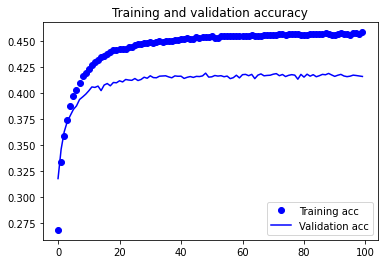

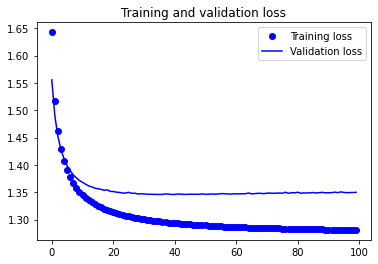

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores.
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

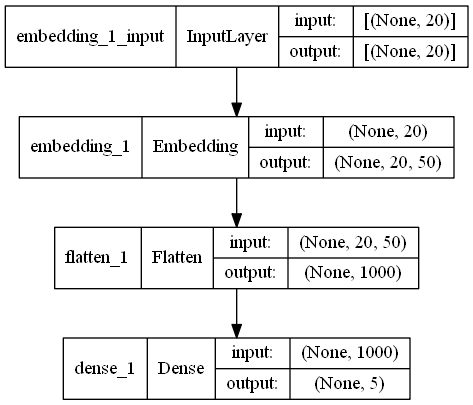

In [ ]:
# Converts a Keras model to dot format and save to a file.
plot_model(model2, show_shapes = True, to_file='model2.png')

In [ ]:
# Save the Model.
model2.save('text_model_2.h5')

### Model #3: Pre-Trained GloVe Word Embeddings (Unfreeze Pre-Trained Embedding Layer)

Let **unfreeze the pre-trained embedding layer** and train the model accordingly.

In [ ]:
# Build the model.
model3 = Sequential()
model3.add(Embedding(max_words, embedding_dim1, input_length=maxlen)) # Receive word embedding as input

# Flatten the 3D tensor of embeddings into a 2D tensor of shape `(samples, embedding_dim, maxlen)`
model3.add(Flatten())

# Add the classifier on top.
model3.add(Dense(5, activation='softmax')) # Output dense layer.

# Let compile the model using RMSprop as optimizer.
model3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc']) 

# Print a useful summary of the model & check total and trainable params.
model3.summary()

# Note: This is used as an empty container!

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 50)            750000    
                                                                 
 flatten_2 (Flatten)         (None, 1000)              0         
                                                                 
 dense_2 (Dense)             (None, 5)                 5005      
                                                                 
Total params: 755,005
Trainable params: 755,005
Non-trainable params: 0
_________________________________________________________________


#### Load the GloVe embeddings in the model
The `Embedding` layer has a single weight matrix: a 2D float matrix where each entry `i` is the word vector meant to be associated with index `i`. Simple enough. Let just load the GloVe matrix which is prepared into the `Embedding` layer, the first layer in the model.

In [ ]:
# Let unfreeze the pre-trained embedding layer.
model3.layers[0].set_weights([embedding_matrix])
model3.layers[0].trainable = True # Unfreeze the pre-trained embedding layer! 

In [ ]:
# Print a useful summary of the model & Check trainable params.
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 50)            750000    
                                                                 
 flatten_2 (Flatten)         (None, 1000)              0         
                                                                 
 dense_2 (Dense)             (None, 5)                 5005      
                                                                 
Total params: 755,005
Trainable params: 755,005
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Let compile the model using RMSprop as optimizer with learning rate of 0.0001.
model3.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc']) 

In [ ]:
# Train the model on GPU & record its total time in second.
with tf.device('/device:GPU:0'):
    start = time.time()
    history3 = model3.fit(X_train, y_train,
                        epochs=epoch,
                        batch_size=epochs_size,
                        validation_data= (X_test, y_test))
    print("Total time: ", time.time() - start, "seconds")

Epoch 1/100
440/440 [==============================] - 3s 6ms/step - loss: 1.6130 - acc: 0.2856 - val_loss: 1.5364 - val_acc: 0.3175
Epoch 2/100
440/440 [==============================] - 2s 5ms/step - loss: 1.4914 - acc: 0.3415 - val_loss: 1.4612 - val_acc: 0.3457
Epoch 3/100
440/440 [==============================] - 2s 5ms/step - loss: 1.4280 - acc: 0.3701 - val_loss: 1.4159 - val_acc: 0.3678
Epoch 4/100
440/440 [==============================] - 2s 5ms/step - loss: 1.3860 - acc: 0.3915 - val_loss: 1.3852 - val_acc: 0.3856
Epoch 5/100
440/440 [==============================] - 2s 5ms/step - loss: 1.3550 - acc: 0.4091 - val_loss: 1.3622 - val_acc: 0.3969.3549 - acc: 0.4 - ETA: 0s - loss: 1.3540 - acc: 0.40
Epoch 6/100
440/440 [==============================] - 2s 5ms/step - loss: 1.3303 - acc: 0.4232 - val_loss: 1.3425 - val_acc: 0.4095
Epoch 7/100
440/440 [==============================] - 2s 5ms/step - loss: 1.3093 - acc: 0.4375 - val_loss: 1.3270 - val_acc: 0.4195
Epoch 8/100
440/

Epoch 59/100
440/440 [==============================] - 2s 5ms/step - loss: 1.0146 - acc: 0.5949 - val_loss: 1.2044 - val_acc: 0.4927- acc: 0
Epoch 60/100
440/440 [==============================] - 2s 5ms/step - loss: 1.0117 - acc: 0.5952 - val_loss: 1.2053 - val_acc: 0.4943
Epoch 61/100
440/440 [==============================] - 2s 5ms/step - loss: 1.0088 - acc: 0.5971 - val_loss: 1.2058 - val_acc: 0.4967
Epoch 62/100
440/440 [==============================] - 2s 5ms/step - loss: 1.0059 - acc: 0.5982 - val_loss: 1.2057 - val_acc: 0.49111.0 - ETA: 0s - loss: 1.0048 - acc: 0.59
Epoch 63/100
440/440 [==============================] - 2s 5ms/step - loss: 1.0032 - acc: 0.6001 - val_loss: 1.2067 - val_acc: 0.4921
Epoch 64/100
440/440 [==============================] - 2s 5ms/step - loss: 1.0003 - acc: 0.6026 - val_loss: 1.2076 - val_acc: 0.4942
Epoch 65/100
440/440 [==============================] - 2s 5ms/step - loss: 0.9976 - acc: 0.6028 - val_loss: 1.2078 - val_acc: 0.4946
Epoch 66/100
4

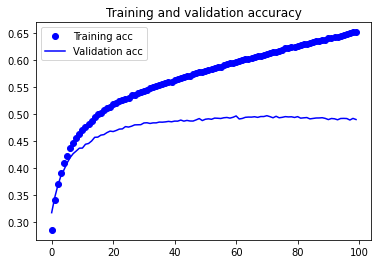

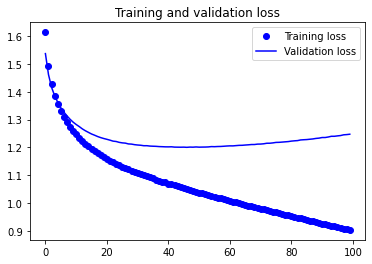

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores.
acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

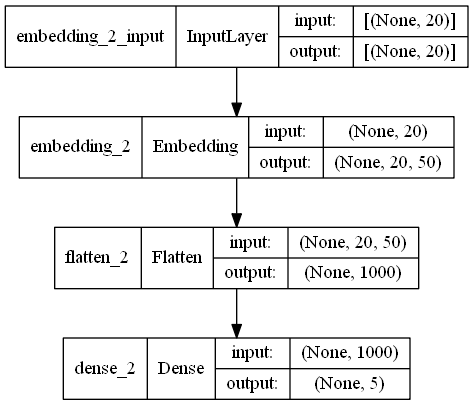

In [ ]:
# Converts a Keras model to dot format and save to a file.
plot_model(model3, show_shapes = True, to_file='model3.png')

In [ ]:
# Save the Model.
model3.save('text_model_3.h5')

### Model #4: Pre-Trained GloVe Word Embeddings (Unfreeze Pre-Trained Embedding Layer) + LSTM + Regularization + Dropout + Flatten + Dense Layers

In [ ]:
# Build the model.
model4 = Sequential()
model4.add(Embedding(max_words, embedding_dim1, input_length=maxlen)) # Receive word embedding as input
model4.add(LSTM(300, kernel_regularizer=regularizers.l2(0.002), activation='relu', return_sequences=True)) # 1st LSTM L2 regularization with coefficient 0.002 layer
model4.add(Dropout(0.9)) # Add a Dropout layer 0.9
model4.add(LSTM(150)) # 2nd LSTM layer

# Flatten the 3D tensor of embeddings into a 2D tensor of shape `(samples, embedding_dim, maxlen)`
model4.add(Flatten())

# Add the classifier on top.
model4.add(Dense(5, activation='softmax')) # Output dense layer.

# Let compile the model using RMSprop as optimizer.
model4.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc']) 

# Print a useful summary of the model & check total and trainable params.
model4.summary()

# Note: This is used as an empty container!

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 20, 50)            750000    
                                                                 
 lstm (LSTM)                 (None, 20, 300)           421200    
                                                                 
 dropout (Dropout)           (None, 20, 300)           0         
                                                                 
 lstm_1 (LSTM)               (None, 150)               270600    
                                                                 
 flatten_3 (Flatten)         (None, 150)               0         
                                                                 
 dense_3 (Dense)             (None, 5)                 755       
                                                                 
Total params: 1,442,555
Trainable params: 1,442,555
No

#### Load the GloVe embeddings in the model
The `Embedding` layer has a single weight matrix: a 2D float matrix where each entry `i` is the word vector meant to be associated with index `i`. Simple enough. Let's just load the GloVe matrix which is prepared into the `Embedding` layer, the first layer in the model:

In [ ]:
# Let unfreeze the pre-trained embedding layer.
model4.layers[0].set_weights([embedding_matrix])
model4.layers[0].trainable = True # Unfreeze the pre-trained embedding layer! 

In [ ]:
# Print a useful summary of the model & check total and trainable params.
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 20, 50)            750000    
                                                                 
 lstm (LSTM)                 (None, 20, 300)           421200    
                                                                 
 dropout (Dropout)           (None, 20, 300)           0         
                                                                 
 lstm_1 (LSTM)               (None, 150)               270600    
                                                                 
 flatten_3 (Flatten)         (None, 150)               0         
                                                                 
 dense_3 (Dense)             (None, 5)                 755       
                                                                 
Total params: 1,442,555
Trainable params: 1,442,555
No

In [ ]:
# Let compile the model using RMSprop as optimizer with learning rate of 0.0001.
model4.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc']) 

In [ ]:
# Train the model on GPU & record its total time in second.
with tf.device('/device:GPU:0'):
    start = time.time()
    history4 = model4.fit(X_train, y_train,
                        epochs=epoch,
                        batch_size=epochs_size,
                        validation_data= (X_test, y_test))
    print("Total time: ", time.time() - start, "seconds")

Epoch 1/100
440/440 [==============================] - 61s 132ms/step - loss: 1.5629 - acc: 0.3440 - val_loss: 1.4352 - val_acc: 0.3925
Epoch 2/100
440/440 [==============================] - 58s 131ms/step - loss: 1.4024 - acc: 0.4078 - val_loss: 1.3574 - val_acc: 0.4253
Epoch 3/100
440/440 [==============================] - 58s 131ms/step - loss: 1.3447 - acc: 0.4292 - val_loss: 1.3177 - val_acc: 0.4420
Epoch 4/100
440/440 [==============================] - 57s 130ms/step - loss: 1.3119 - acc: 0.4428 - val_loss: 1.2960 - val_acc: 0.4513
Epoch 5/100
440/440 [==============================] - 57s 130ms/step - loss: 1.2856 - acc: 0.4590 - val_loss: 1.2722 - val_acc: 0.4649
Epoch 6/100
440/440 [==============================] - 57s 130ms/step - loss: 1.2673 - acc: 0.4658 - val_loss: 1.2646 - val_acc: 0.4618
Epoch 7/100
440/440 [==============================] - 57s 131ms/step - loss: 1.2526 - acc: 0.4739 - val_loss: 1.2450 - val_acc: 0.4775
Epoch 8/100
440/440 [===========================

Epoch 61/100
440/440 [==============================] - 57s 130ms/step - loss: 1.0108 - acc: 0.5865 - val_loss: 1.2445 - val_acc: 0.5052
Epoch 62/100
440/440 [==============================] - 57s 130ms/step - loss: 1.0088 - acc: 0.5871 - val_loss: 1.2274 - val_acc: 0.4963
Epoch 63/100
440/440 [==============================] - 57s 130ms/step - loss: 1.0043 - acc: 0.5904 - val_loss: 1.2330 - val_acc: 0.4983
Epoch 64/100
440/440 [==============================] - 57s 130ms/step - loss: 1.0016 - acc: 0.5911 - val_loss: 1.2863 - val_acc: 0.5011
Epoch 65/100
440/440 [==============================] - 57s 130ms/step - loss: 0.9979 - acc: 0.5912 - val_loss: 1.2496 - val_acc: 0.4970
Epoch 66/100
440/440 [==============================] - 57s 130ms/step - loss: 0.9955 - acc: 0.5951 - val_loss: 1.2779 - val_acc: 0.5067
Epoch 67/100
440/440 [==============================] - 57s 130ms/step - loss: 0.9887 - acc: 0.5979 - val_loss: 1.2278 - val_acc: 0.5060
Epoch 68/100
440/440 [===================

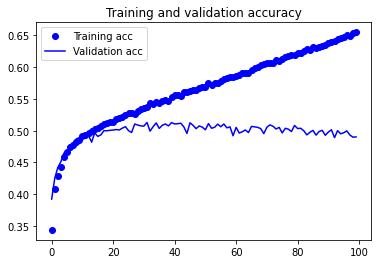

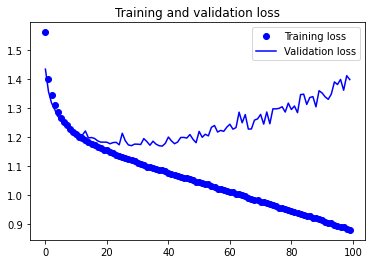

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores.
acc = history4.history['acc']
val_acc = history4.history['val_acc']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

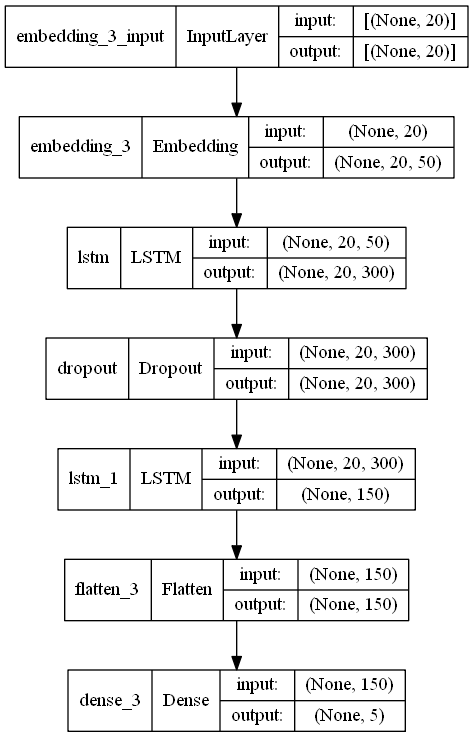

In [ ]:
# Converts a Keras model to dot format and save to a file.
plot_model(model4, show_shapes = True, to_file='model4.png')

In [ ]:
# Save the Model.
model4.save('text_model_4.h5')

### Model #5: Embedding + SimpleRNN  + Dense + Regularization + Dropout Layers

Let start by using a simple RNN layer in Keras: the `SimpleRNN` layer:

`SimpleRNN` processes batches of sequences, like all other Keras layers. This means that it takes inputs of shape `(batch_size, timesteps, input_features)`.`SimpleRNN` can be run in **two different modes:** [(1) it can return either the full sequences of successive 
outputs for each timestep (a 3D tensor of shape `(batch_size, timesteps, output_features)`)](x), or [(2) it can return only the last output for each input sequence (a 2D tensor of shape `(batch_size, output_features)`)](x). These two modes are controlled by the `return_sequences` constructor argument.

It is sometimes useful to stack several recurrent layers one after the other in order to increase the representational power of a network. 
In such a setup, have to get all intermediate layers to return full sequences.

tf.keras.layers.SimpleRNN is a fully-connected RNN where the output is to be fed back to input. [Link](https://www.tensorflow.org/api_docs/python/tf/keras/layers/SimpleRNN)

In [ ]:
# Build the model.
model5 = Sequential()
model5.add(Embedding(max_words, embedding_dim, input_length=maxlen)) # Receive word embedding as input
model5.add(SimpleRNN(32, return_sequences=True)) # 1st SimpleRNN layer
model5.add(SimpleRNN(32)) # 2nd SimpleRNN layer
model5.add(Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu')) # 1st Dense, L2 regularization with coefficient 0.001 layer
model5.add(Dropout(0.01)) # 1st Dropout layer 0.01
model5.add(Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu')) # 2nd Dense, L2 regularization with coefficient 0.001 layer
model5.add(Dropout(0.1)) # 2nd Dropout layer 0.1

# Add the classifier on top.
model5.add(Dense(5, activation='softmax')) # Output dense layer.

# Print a useful summary of the model & check total and trainable params.
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 20, 5)             75000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 20, 32)            1216      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dropout_2 (Dropout)         (None, 32)               

In [ ]:
# Let compile the model using RMSprop as optimizer with learning rate of 0.0001.
model5.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
# Train the model on GPU & record its total time in second.
with tf.device('/device:GPU:0'):
    start = time.time()
    history5 = model5.fit(X_train, y_train,
                        epochs=epoch,
                        batch_size=epochs_size,
                        validation_data= (X_test, y_test))
    print("Total time: ", time.time() - start, "seconds")

Epoch 1/100
440/440 [==============================] - 6s 9ms/step - loss: 1.6185 - acc: 0.2911 - val_loss: 1.5744 - val_acc: 0.3137
Epoch 2/100
440/440 [==============================] - 4s 8ms/step - loss: 1.5583 - acc: 0.3181 - val_loss: 1.5208 - val_acc: 0.3396
Epoch 3/100
440/440 [==============================] - 4s 9ms/step - loss: 1.4964 - acc: 0.3433 - val_loss: 1.4526 - val_acc: 0.3595
Epoch 4/100
440/440 [==============================] - 4s 8ms/step - loss: 1.4362 - acc: 0.3627 - val_loss: 1.4044 - val_acc: 0.3710
Epoch 5/100
440/440 [==============================] - 4s 9ms/step - loss: 1.3850 - acc: 0.3874 - val_loss: 1.3582 - val_acc: 0.4115
Epoch 6/100
440/440 [==============================] - 4s 9ms/step - loss: 1.3399 - acc: 0.4161 - val_loss: 1.3214 - val_acc: 0.4319
Epoch 7/100
440/440 [==============================] - 4s 8ms/step - loss: 1.3096 - acc: 0.4344 - val_loss: 1.3047 - val_acc: 0.4420
Epoch 8/100
440/440 [==============================] - 4s 8ms/step - 

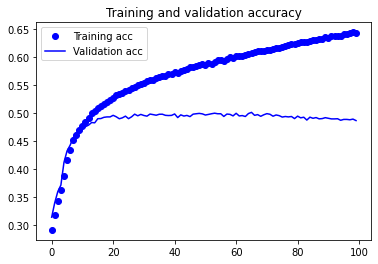

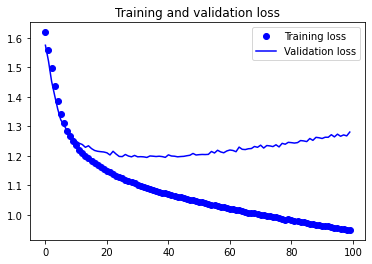

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores.
acc = history5.history['acc']
val_acc = history5.history['val_acc']
loss = history5.history['loss']
val_loss = history5.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

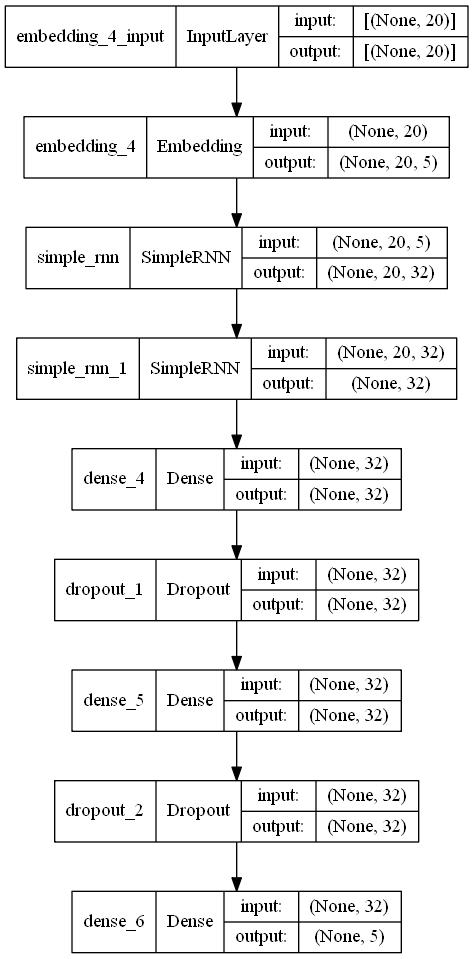

In [ ]:
# Converts a Keras model to dot format and save to a file.
plot_model(model5, show_shapes = True, to_file='model5.png')

In [ ]:
# Save the Model.
model5.save('text_model_5.h5')

### Model #6:  Embedding + Long Short-Term Memory (LSTM) + Dense + Regularization Dropout Layers

Here is the network, similar to the one with `SimpleRNN`. **only specify the output dimensionality of the LSTM layer**, and leave every other argument (there are lots) to the Keras defaults. Keras has good defaults, and things will almost always "just work" without having to spend time tuning parameters by hand.

tf.keras.layers.LSTM is for Long Short-Term Memory layer. [Link](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM)

In [ ]:
# Build the model.
model6 = Sequential()
model6.add(Embedding(max_words, embedding_dim, input_length=maxlen)) # Receive word embedding as input.
model6.add(LSTM(128,  dropout = 0.2, recurrent_dropout = 0.2, return_sequences=True)) # LSTM, dropout, recurrent dropout layer
model6.add(Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu')) # Dense, L2 regularization with coefficient 0.001 layer
model6.add(Dropout(0.1)) # 1st Dropout layer 0.1
model6.add(Dropout(0.2)) # 2nd Dropout layer 0.2

# Flatten the 3D tensor of embeddings into a 2D tensor of shape `(samples, embedding_dim, maxlen)`
model6.add(Flatten())

# Add the classifier on top.
model6.add(Dense(5, activation='softmax')) # Output dense layer.

# Print a useful summary of the model & check total and trainable params.
model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 20, 5)             75000     
                                                                 
 lstm_2 (LSTM)               (None, 20, 128)           68608     
                                                                 
 dense_7 (Dense)             (None, 20, 32)            4128      
                                                                 
 dropout_3 (Dropout)         (None, 20, 32)            0         
                                                                 
 dropout_4 (Dropout)         (None, 20, 32)            0         
                                                                 
 flatten_4 (Flatten)         (None, 640)               0         
                                                                 
 dense_8 (Dense)             (None, 5)                

In [ ]:
# Let compile the model using RMSprop as optimizer with learning rate of 0.0001.
model6.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
# Train the model on GPU & record its total time in second.
with tf.device('/device:GPU:0'):
    start = time.time()
    history6 = model6.fit(X_train, y_train,
                        epochs=epoch,
                        batch_size=epochs_size,
                        validation_data= (X_test, y_test))
    print("Total time: ", time.time() - start, "seconds")

Epoch 1/100
440/440 [==============================] - 15s 28ms/step - loss: 1.5957 - acc: 0.2945 - val_loss: 1.5520 - val_acc: 0.3057
Epoch 2/100
440/440 [==============================] - 12s 27ms/step - loss: 1.5389 - acc: 0.3110 - val_loss: 1.5139 - val_acc: 0.3235
Epoch 3/100
440/440 [==============================] - 12s 26ms/step - loss: 1.4844 - acc: 0.3323 - val_loss: 1.4411 - val_acc: 0.3560
Epoch 4/100
440/440 [==============================] - 12s 27ms/step - loss: 1.4304 - acc: 0.3590 - val_loss: 1.4042 - val_acc: 0.3726
Epoch 5/100
440/440 [==============================] - 12s 27ms/step - loss: 1.3941 - acc: 0.3771 - val_loss: 1.3684 - val_acc: 0.3923
Epoch 6/100
440/440 [==============================] - 12s 27ms/step - loss: 1.3648 - acc: 0.3909 - val_loss: 1.3453 - val_acc: 0.4076
Epoch 7/100
440/440 [==============================] - 12s 26ms/step - loss: 1.3424 - acc: 0.4008 - val_loss: 1.3258 - val_acc: 0.4202
Epoch 8/100
440/440 [==============================] - 

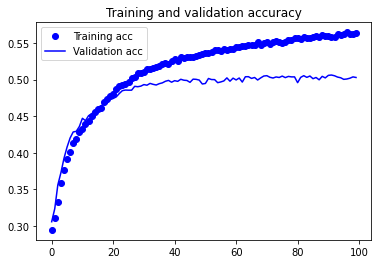

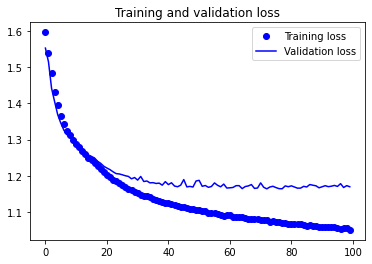

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores.
acc = history6.history['acc']
val_acc = history6.history['val_acc']
loss = history6.history['loss']
val_loss = history6.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

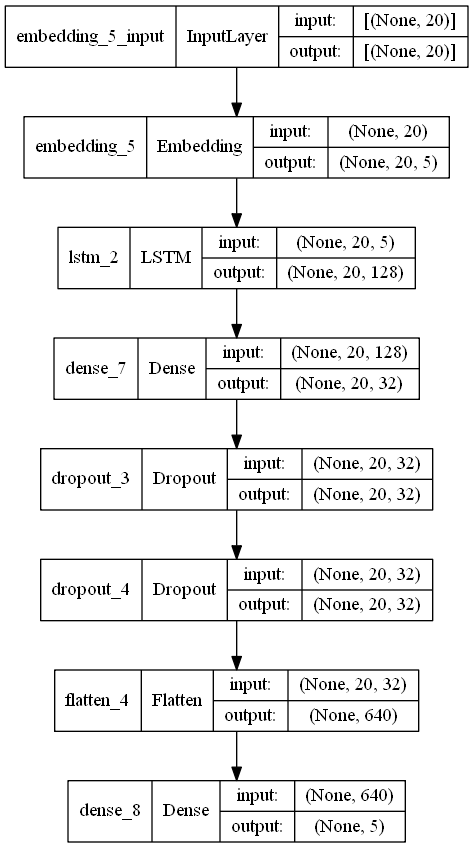

In [ ]:
# Converts a Keras model to dot format and save to a file.
plot_model(model6, show_shapes = True, to_file='model6.png')

In [ ]:
# Save the Model.
model6.save('text_model_6.h5')

### Model #6A: Embedding + Long Short-Term Memory (LSTM) + Dense Layers + Nadam As Optimizer 

Here is the network, similar to the one with `SimpleRNN`. **only specify the output dimensionality of the LSTM layer**, and leave every other argument (there are lots) to the Keras defaults. Keras has good defaults, and things will almost always "just work" without having to spend time tuning parameters by hand.

tf.keras.layers.LSTM is for Long Short-Term Memory layer. [Link](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM)

In [ ]:
# Build the model.
model6A = Sequential()
model6A.add(Embedding(max_words, embedding_dim, input_length=maxlen)) # Receive word embedding as input
model6A.add(LSTM(128,  dropout = 0.2, recurrent_dropout = 0.2, return_sequences=True)) # LSTM, dropout, recurrent dropout layer

# Flatten the 3D tensor of embeddings into a 2D tensor of shape `(samples, embedding_dim, maxlen)`
model6A.add(Flatten())

# Add the classifier on top.
model6A.add(Dense(5, activation='softmax')) # Output dense layer.

# Print a useful summary of the model & check total and trainable params.
model6A.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 20, 5)             75000     
                                                                 
 lstm_3 (LSTM)               (None, 20, 128)           68608     
                                                                 
 flatten_5 (Flatten)         (None, 2560)              0         
                                                                 
 dense_9 (Dense)             (None, 5)                 12805     
                                                                 
Total params: 156,413
Trainable params: 156,413
Non-trainable params: 0
_________________________________________________________________


Optimizer that implements the NAdam algorithm. Much like Adam is essentially RMSprop with momentum, Nadam is Adam with Nesterov momentum.

In [ ]:
# Let compile the model using Nadam as optimizer.
model6A.compile(optimizer=optimizers.Nadam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
# Train the model on GPU & record its total time in second.
with tf.device('/device:GPU:0'):
    start = time.time()
    history6A = model6A.fit(X_train, y_train,
                        epochs=epoch,
                        batch_size=epochs_size,
                        validation_data= (X_test, y_test))
    print("Total time: ", time.time() - start, "seconds")

Epoch 1/100
440/440 [==============================] - 14s 27ms/step - loss: 1.5322 - acc: 0.2996 - val_loss: 1.5011 - val_acc: 0.3124
Epoch 2/100
440/440 [==============================] - 11s 26ms/step - loss: 1.4798 - acc: 0.3241 - val_loss: 1.4410 - val_acc: 0.3521
Epoch 3/100
440/440 [==============================] - 12s 26ms/step - loss: 1.4080 - acc: 0.3709 - val_loss: 1.3800 - val_acc: 0.3828
Epoch 4/100
440/440 [==============================] - 12s 26ms/step - loss: 1.3574 - acc: 0.3966 - val_loss: 1.3319 - val_acc: 0.4079
Epoch 5/100
440/440 [==============================] - 11s 26ms/step - loss: 1.3189 - acc: 0.4152 - val_loss: 1.3033 - val_acc: 0.4195
Epoch 6/100
440/440 [==============================] - 12s 26ms/step - loss: 1.2921 - acc: 0.4294 - val_loss: 1.2797 - val_acc: 0.4349
Epoch 7/100
440/440 [==============================] - 12s 26ms/step - loss: 1.2691 - acc: 0.4400 - val_loss: 1.2639 - val_acc: 0.4453
Epoch 8/100
440/440 [==============================] - 

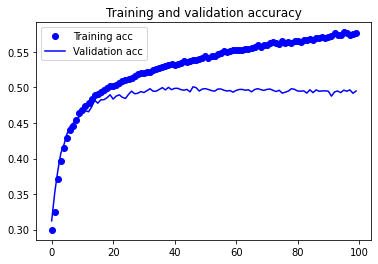

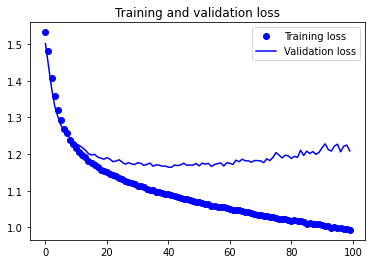

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores.
acc = history6A.history['acc']
val_acc = history6A.history['val_acc']
loss = history6A.history['loss']
val_loss = history6A.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

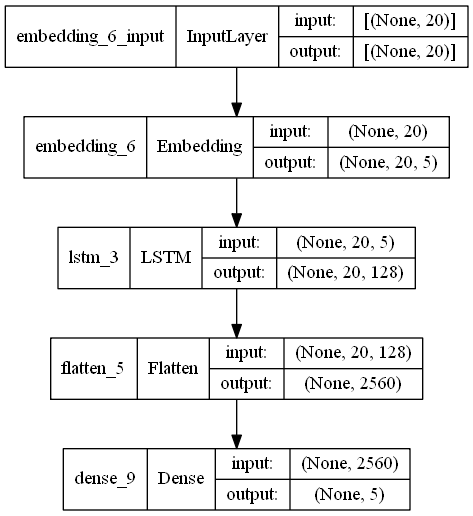

In [ ]:
# Converts a Keras model to dot format and save to a file.
plot_model(model6A, show_shapes = True, to_file='model6A.png')

In [ ]:
# Save the Model.
model6A.save('text_model_6A.h5')

### Model #6B: Long Short-Term Memory (LSTM) + Dropout + Recurrent Dropout + Embedding Layers + Adam Optimizer 

In [ ]:
# Build the model.
model6B = Sequential()
model6B.add(Embedding(max_words, embedding_dim, input_length=maxlen)) # Receive word embedding as input
model6B.add(LSTM(128,  dropout = 0.2, recurrent_dropout = 0.2, return_sequences=True))  # LSTM, dropout, recurrent dropout layer

# Flatten the 3D tensor of embeddings into a 2D tensor of shape `(samples, embedding_dim, maxlen)`
model6B.add(Flatten())

# Add the classifier on top.
model6B.add(Dense(5, activation='softmax')) # Output dense layer.

# Print a useful summary of the model & check total and trainable params.
model6B.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 20, 5)             75000     
                                                                 
 lstm_4 (LSTM)               (None, 20, 128)           68608     
                                                                 
 flatten_6 (Flatten)         (None, 2560)              0         
                                                                 
 dense_10 (Dense)            (None, 5)                 12805     
                                                                 
Total params: 156,413
Trainable params: 156,413
Non-trainable params: 0
_________________________________________________________________


Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems.

In [ ]:
# Let compile the model using Adam as optimizer.
model6B.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
# Train the model on GPU & record its total time in second.
with tf.device('/device:GPU:0'):
    start = time.time()
    history6B = model6B.fit(X_train, y_train,
                        epochs=epoch,
                        batch_size=epochs_size,
                        validation_data= (X_test, y_test))
    print("Total time: ", time.time() - start, "seconds")

Epoch 1/100
440/440 [==============================] - 14s 27ms/step - loss: 1.5319 - acc: 0.2995 - val_loss: 1.4935 - val_acc: 0.3153
Epoch 2/100
440/440 [==============================] - 11s 26ms/step - loss: 1.4545 - acc: 0.3390 - val_loss: 1.4075 - val_acc: 0.3726
Epoch 3/100
440/440 [==============================] - 12s 27ms/step - loss: 1.3816 - acc: 0.3842 - val_loss: 1.3545 - val_acc: 0.3988
Epoch 4/100
440/440 [==============================] - 12s 26ms/step - loss: 1.3310 - acc: 0.4089 - val_loss: 1.3108 - val_acc: 0.4114
Epoch 5/100
440/440 [==============================] - 12s 26ms/step - loss: 1.2943 - acc: 0.4278 - val_loss: 1.2838 - val_acc: 0.4285
Epoch 6/100
440/440 [==============================] - 12s 26ms/step - loss: 1.2672 - acc: 0.4416 - val_loss: 1.2672 - val_acc: 0.4423
Epoch 7/100
440/440 [==============================] - 12s 27ms/step - loss: 1.2472 - acc: 0.4519 - val_loss: 1.2528 - val_acc: 0.4451
Epoch 8/100
440/440 [==============================] - 

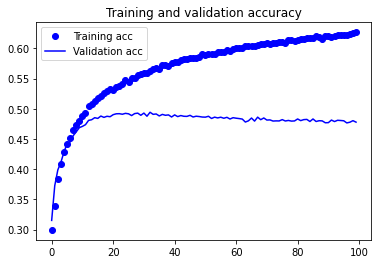

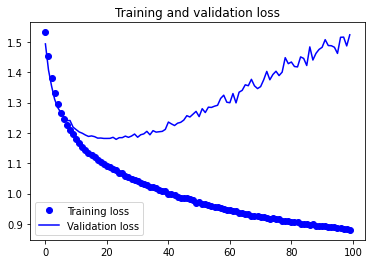

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores.
acc = history6B.history['acc']
val_acc = history6B.history['val_acc']
loss = history6B.history['loss']
val_loss = history6B.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

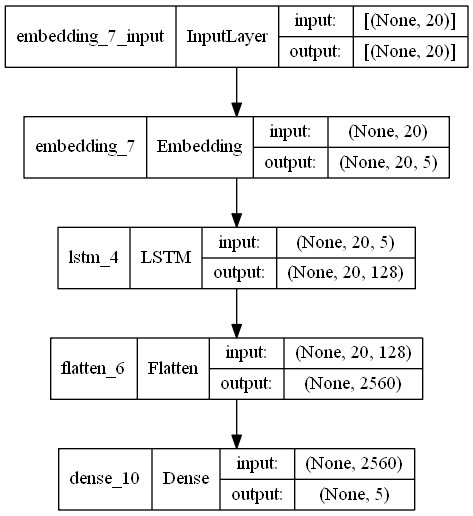

In [ ]:
# Converts a Keras model to dot format and save to a file.
plot_model(model6B, show_shapes = True, to_file='model6B.png')

In [ ]:
# Save the Model.
model6B.save('text_model_6B.h5')

### Model #7:  Long Short-Term Memory (LSTM) With Bidirectional + Dropout + Embedding Layers

Bidirectional recurrent neural networks (BRNN) connect two hidden layers of opposite directions to the same output. With this form of generative deep learning, the output layer can get information from past (backwards) and future (forward) states simultaneously.

In [ ]:
# Build the model.
model7 = Sequential()
model7.add(Embedding(max_words, embedding_dim, input_length=maxlen))  # Receive word embedding as input
model7.add(layers.Bidirectional(layers.LSTM(32, return_sequences=True))) # 1st LSTM with Bidirectional layer
model7.add(layers.Bidirectional(layers.LSTM(32))) # 2nd LSTM with Bidirectional layer
model7.add(Dropout(0.1)) # Add Dropout layer 0.1

# Add the classifier on top.
model7.add(Dense(5, activation='softmax')) # Output dense layer.

# Print a useful summary of the model & check total and trainable params.
model7.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 20, 5)             75000     
                                                                 
 bidirectional (Bidirectiona  (None, 20, 64)           9728      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 5)                 325       
                                                                 
Total params: 109,885
Trainable params: 109,885
Non-tr

In [ ]:
# Let compile the model using RMSprop as optimizer with learning rate of 0.0001.
model7.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
# Train the model on GPU & record its total time in second.
with tf.device('/device:GPU:0'):
    start = time.time()
    history7 = model7.fit(X_train, y_train,
                        epochs=epoch,
                        batch_size=epochs_size,
                        validation_data= (X_test, y_test))
    print("Total time: ", time.time() - start, "seconds")

Epoch 1/100
440/440 [==============================] - 16s 22ms/step - loss: 1.5436 - acc: 0.2995 - val_loss: 1.4825 - val_acc: 0.3165
Epoch 2/100
440/440 [==============================] - 8s 18ms/step - loss: 1.4329 - acc: 0.3373 - val_loss: 1.3690 - val_acc: 0.3596
Epoch 3/100
440/440 [==============================] - 8s 18ms/step - loss: 1.3343 - acc: 0.3749 - val_loss: 1.3189 - val_acc: 0.3956
Epoch 4/100
440/440 [==============================] - 8s 18ms/step - loss: 1.2995 - acc: 0.3967 - val_loss: 1.2991 - val_acc: 0.4051
Epoch 5/100
440/440 [==============================] - 8s 18ms/step - loss: 1.2778 - acc: 0.4146 - val_loss: 1.2833 - val_acc: 0.4231
Epoch 6/100
440/440 [==============================] - 8s 18ms/step - loss: 1.2588 - acc: 0.4272 - val_loss: 1.2712 - val_acc: 0.4276
Epoch 7/100
440/440 [==============================] - 8s 18ms/step - loss: 1.2435 - acc: 0.4400 - val_loss: 1.2581 - val_acc: 0.4369
Epoch 8/100
440/440 [==============================] - 8s 18m

Epoch 62/100
440/440 [==============================] - 8s 18ms/step - loss: 1.0112 - acc: 0.5909 - val_loss: 1.1908 - val_acc: 0.5003
Epoch 63/100
440/440 [==============================] - 8s 18ms/step - loss: 1.0087 - acc: 0.5933 - val_loss: 1.1849 - val_acc: 0.5016
Epoch 64/100
440/440 [==============================] - 8s 18ms/step - loss: 1.0073 - acc: 0.5943 - val_loss: 1.1865 - val_acc: 0.5036
Epoch 65/100
440/440 [==============================] - 8s 18ms/step - loss: 1.0054 - acc: 0.5962 - val_loss: 1.1915 - val_acc: 0.5029
Epoch 66/100
440/440 [==============================] - 8s 18ms/step - loss: 1.0029 - acc: 0.5962 - val_loss: 1.1983 - val_acc: 0.5043
Epoch 67/100
440/440 [==============================] - 8s 18ms/step - loss: 0.9995 - acc: 0.6001 - val_loss: 1.1942 - val_acc: 0.5043
Epoch 68/100
440/440 [==============================] - 8s 18ms/step - loss: 0.9975 - acc: 0.5993 - val_loss: 1.1969 - val_acc: 0.5037
Epoch 69/100
440/440 [==============================] -

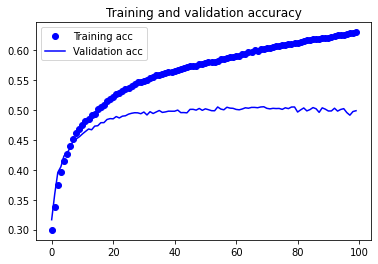

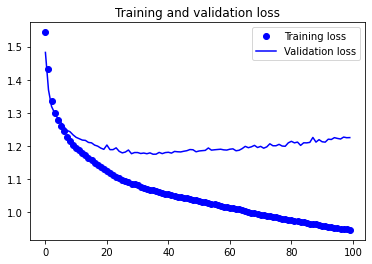

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores.
acc = history7.history['acc']
val_acc = history7.history['val_acc']
loss = history7.history['loss']
val_loss = history7.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

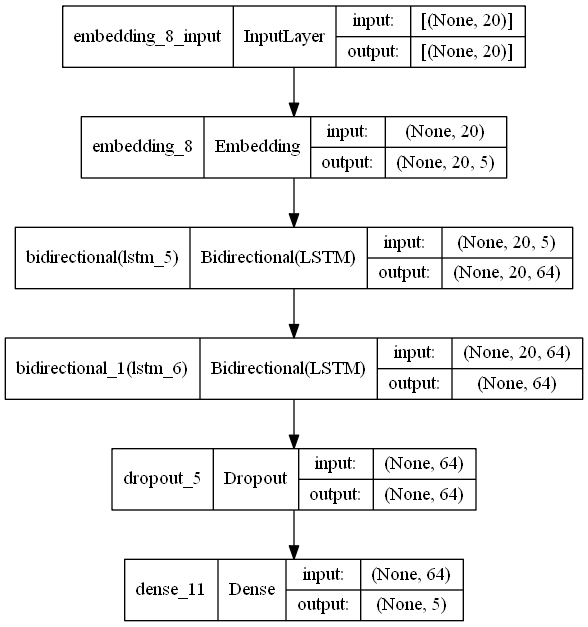

In [ ]:
# Converts a Keras model to dot format and save to a file.
plot_model(model7, show_shapes = True, to_file='model7.png')

In [ ]:
# Save the Model.
model7.save('text_model_7.h5')

### Model #8: GRU (Gated Recurrent Units) + Dropout +Recurrent Dropout + Embedding Layers

The GRU is the newer generation of Recurrent Neural networks and is pretty similar to an LSTM. GRU’s got rid of the cell state and used the hidden state to transfer information. It also only has two gates, a reset gate and update gate.


In [ ]:
# Build the model.
model8 = Sequential()
model8.add(Embedding(max_words, embedding_dim, input_length=maxlen)) # Receive word embedding as input
model8.add(GRU(64,return_sequences=True)) # 1st GRU layer
model8.add(GRU(32, dropout = 0.1, recurrent_dropout = 0.1, return_sequences=True)) # 2nd GRU, dropout, recurrent dropout layer
model8.add(GRU(16,dropout = 0.2,recurrent_dropout = 0.1)) # 3rd GRU, dropout, recurrent dropout layer

# Add the classifier on top.
model8.add(Dense(5, activation='softmax'))  # Output dense layer.

# Print a useful summary of the model & check total and trainable params.
model8.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 20, 5)             75000     
                                                                 
 gru (GRU)                   (None, 20, 64)            13632     
                                                                 
 gru_1 (GRU)                 (None, 20, 32)            9408      
                                                                 
 gru_2 (GRU)                 (None, 16)                2400      
                                                                 
 dense_12 (Dense)            (None, 5)                 85        
                                                                 
Total params: 100,525
Trainable params: 100,525
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Let compile the model using RMSprop as optimizer with learning rate of 0.0001.
model8.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
# Train the model on GPU & record its total time in second.
with tf.device('/device:GPU:0'):
    start = time.time()
    history8 = model8.fit(X_train, y_train,
                        epochs=epoch,
                        batch_size=epochs_size,
                        validation_data= (X_test, y_test))
    print("Total time: ", time.time() - start, "seconds")

Epoch 1/100
440/440 [==============================] - 18s 28ms/step - loss: 1.5428 - acc: 0.3025 - val_loss: 1.4890 - val_acc: 0.3141
Epoch 2/100
440/440 [==============================] - 12s 26ms/step - loss: 1.4601 - acc: 0.3296 - val_loss: 1.4180 - val_acc: 0.3407
Epoch 3/100
440/440 [==============================] - 12s 26ms/step - loss: 1.3785 - acc: 0.3576 - val_loss: 1.3537 - val_acc: 0.3539
Epoch 4/100
440/440 [==============================] - 11s 26ms/step - loss: 1.3352 - acc: 0.3754 - val_loss: 1.3276 - val_acc: 0.3908
Epoch 5/100
440/440 [==============================] - 11s 26ms/step - loss: 1.3088 - acc: 0.3962 - val_loss: 1.3104 - val_acc: 0.4041
Epoch 6/100
440/440 [==============================] - 12s 26ms/step - loss: 1.2896 - acc: 0.4120 - val_loss: 1.2959 - val_acc: 0.4155
Epoch 7/100
440/440 [==============================] - 11s 26ms/step - loss: 1.2741 - acc: 0.4210 - val_loss: 1.2853 - val_acc: 0.4255
Epoch 8/100
440/440 [==============================] - 

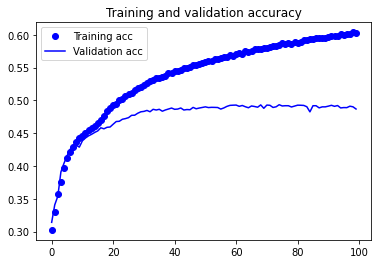

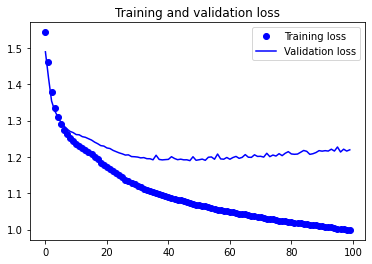

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores.
acc = history8.history['acc']
val_acc = history8.history['val_acc']
loss = history8.history['loss']
val_loss = history8.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

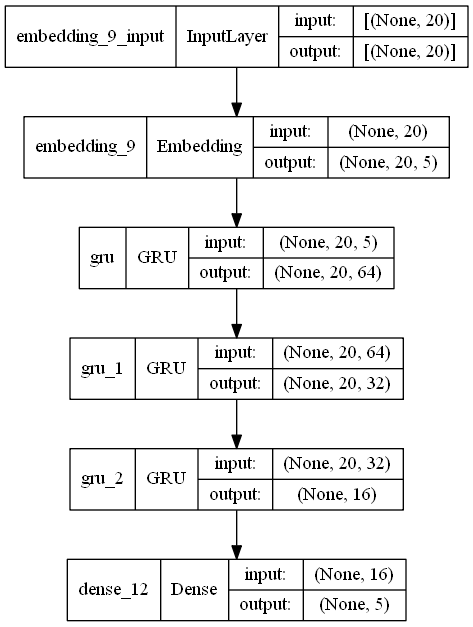

In [ ]:
# Converts a Keras model to dot format and save to a file.
plot_model(model8, show_shapes = True, to_file='model8.png')

In [ ]:
# Save the Model.
model8.save('text_model_8.h5')

### Model #9: Gated Recurrent Units (GRU) With Bidirectional + Dropout + Embedding Layers

Bidirectional recurrent neural networks (BRNN) connect two hidden layers of opposite directions to the same output. With this form of generative deep learning, the output layer can get information from past (backwards) and future (forward) states simultaneously.

In [ ]:
# Build the model.
model9 = Sequential()
model9.add(Embedding(max_words, embedding_dim, input_length=maxlen))  # Receive word embedding as input
model9.add(layers.Bidirectional(layers.GRU(32, return_sequences=True))) # 1st LSTM with Bidirectiona layer
model9.add(layers.Bidirectional(layers.GRU(32))) # 2nd LSTM with Bidirectiona layer
model9.add(Dropout(0.1)) # Add Dropout layer 0.1

# Add the classifier on top.
model9.add(Dense(5, activation='softmax')) # Output dense layer.

# Print a useful summary of the model & check total and trainable params.
model9.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 20, 5)             75000     
                                                                 
 bidirectional_2 (Bidirectio  (None, 20, 64)           7488      
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               18816     
 nal)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 5)                 325       
                                                                 
Total params: 101,629
Trainable params: 101,629
Non-t

In [ ]:
# Let compile the model using RMSprop as optimizer with learning rate of 0.0001.
model9.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
# Train the model on GPU & record its total time in second.
with tf.device('/device:GPU:0'):
    start = time.time()
    history9 = model9.fit(X_train, y_train,
                        epochs=epoch,
                        batch_size=epochs_size,
                        validation_data= (X_test, y_test))
    print("Total time: ", time.time() - start, "seconds")

Epoch 1/100
440/440 [==============================] - 14s 18ms/step - loss: 1.5675 - acc: 0.2955 - val_loss: 1.4935 - val_acc: 0.3159
Epoch 2/100
440/440 [==============================] - 6s 15ms/step - loss: 1.4642 - acc: 0.3301 - val_loss: 1.4146 - val_acc: 0.3515
Epoch 3/100
440/440 [==============================] - 6s 15ms/step - loss: 1.3595 - acc: 0.3771 - val_loss: 1.3284 - val_acc: 0.3903
Epoch 4/100
440/440 [==============================] - 6s 14ms/step - loss: 1.3026 - acc: 0.4058 - val_loss: 1.2963 - val_acc: 0.4127
Epoch 5/100
440/440 [==============================] - 6s 15ms/step - loss: 1.2713 - acc: 0.4247 - val_loss: 1.2698 - val_acc: 0.4336
Epoch 6/100
440/440 [==============================] - 6s 14ms/step - loss: 1.2407 - acc: 0.4481 - val_loss: 1.2451 - val_acc: 0.4512
Epoch 7/100
440/440 [==============================] - 6s 15ms/step - loss: 1.2185 - acc: 0.4629 - val_loss: 1.2295 - val_acc: 0.4611
Epoch 8/100
440/440 [==============================] - 6s 15m

Epoch 62/100
440/440 [==============================] - 6s 15ms/step - loss: 1.0280 - acc: 0.5768 - val_loss: 1.1771 - val_acc: 0.4995
Epoch 63/100
440/440 [==============================] - 6s 14ms/step - loss: 1.0273 - acc: 0.5779 - val_loss: 1.1785 - val_acc: 0.5001
Epoch 64/100
440/440 [==============================] - 6s 14ms/step - loss: 1.0258 - acc: 0.5791 - val_loss: 1.1813 - val_acc: 0.4987
Epoch 65/100
440/440 [==============================] - 6s 15ms/step - loss: 1.0245 - acc: 0.5808 - val_loss: 1.1773 - val_acc: 0.4993
Epoch 66/100
440/440 [==============================] - 6s 14ms/step - loss: 1.0243 - acc: 0.5798 - val_loss: 1.1818 - val_acc: 0.4976
Epoch 67/100
440/440 [==============================] - 7s 15ms/step - loss: 1.0226 - acc: 0.5810 - val_loss: 1.1832 - val_acc: 0.5001
Epoch 68/100
440/440 [==============================] - 6s 14ms/step - loss: 1.0220 - acc: 0.5814 - val_loss: 1.1837 - val_acc: 0.4992
Epoch 69/100
440/440 [==============================] -

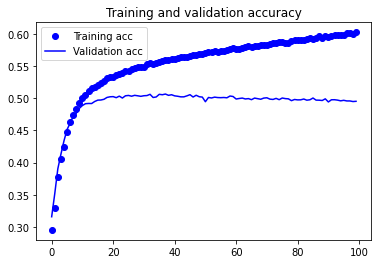

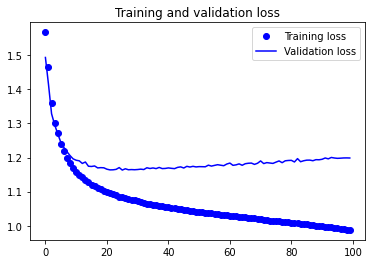

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores.
acc = history9.history['acc']
val_acc = history9.history['val_acc']
loss = history9.history['loss']
val_loss = history9.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

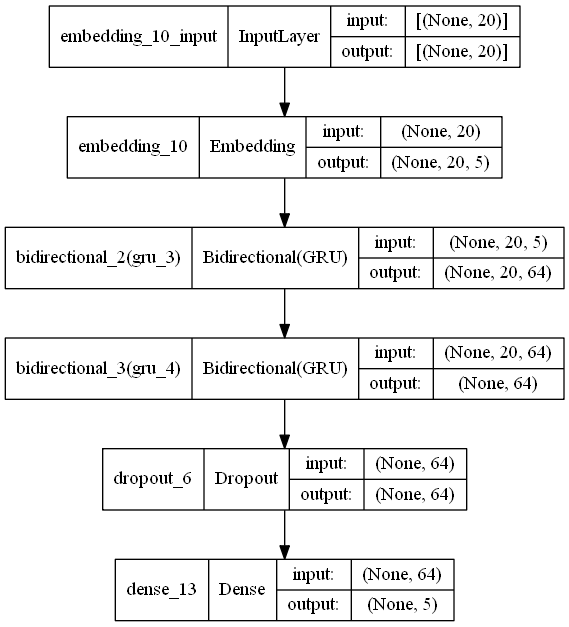

In [ ]:
# Converts a Keras model to dot format and save to a file.
plot_model(model9, show_shapes = True, to_file='model9.png')

In [ ]:
# Save the Model.
model9.save('text_model_9.h5')

### Model #10: Embedding + Dense + MaxPooling1D + Dropout Layers

In [ ]:
# Build the model.
model10 = models.Sequential()
model10.add(Embedding(max_words, embedding_dim, input_length=maxlen)) # Receive word embedding as input
model10.add(layers.Dense(64, activation='relu')) # 1st dense layer
model10.add(layers.Dense(32, activation='relu')) # 2nd dense layer
model10.add(layers.MaxPooling1D(5)) # MaxPooling 1D layer
model10.add(Dropout(0.1)) # Add Dropout layer 0.1
model10.add(layers.Dense(16, activation='sigmoid')) # 3rd dense layer

# Flatten the 3D tensor of embeddings into a 2D tensor of shape `(samples, embedding_dim, maxlen)`
model10.add(Flatten())

# Add the classifier on top.
model10.add(Dense(5, activation='softmax')) # Output dense layer.

# Print a useful summary of the model & check total and trainable params.
model10.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 5)             75000     
                                                                 
 dense_4 (Dense)             (None, 20, 64)            384       
                                                                 
 dense_5 (Dense)             (None, 20, 32)            2080      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 4, 32)            0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 4, 32)             0         
                                                                 
 dense_6 (Dense)             (None, 4, 16)             528       
                                                      

In [ ]:
# Let compile the model using RMSprop as optimizer with learning rate of 0.0001.
model10.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
# Train the model on GPU & record its total time in second.
with tf.device('/device:GPU:0'):
    start = time.time()
    history10 = model10.fit(X_train, y_train,
                        epochs=epoch,
                        batch_size=epochs_size,
                        validation_data= (X_test, y_test))
    print("Total time: ", time.time() - start, "seconds")

Epoch 1/100
440/440 [==============================] - 2s 4ms/step - loss: 1.7926 - acc: 0.1983 - val_loss: 1.6092 - val_acc: 0.2068
Epoch 2/100
440/440 [==============================] - 2s 3ms/step - loss: 1.6028 - acc: 0.2455 - val_loss: 1.5958 - val_acc: 0.2853
Epoch 3/100
440/440 [==============================] - 2s 4ms/step - loss: 1.5836 - acc: 0.2922 - val_loss: 1.5677 - val_acc: 0.3094
Epoch 4/100
440/440 [==============================] - 2s 3ms/step - loss: 1.5510 - acc: 0.3063 - val_loss: 1.5330 - val_acc: 0.3110 - loss: 1.5594 - acc:  - ETA: 0s - loss: 1.5554 - acc:
Epoch 5/100
440/440 [==============================] - 2s 3ms/step - loss: 1.5233 - acc: 0.3108 - val_loss: 1.5120 - val_acc: 0.3142
Epoch 6/100
440/440 [==============================] - 1s 3ms/step - loss: 1.5083 - acc: 0.3166 - val_loss: 1.4991 - val_acc: 0.3192
Epoch 7/100
440/440 [==============================] - 1s 3ms/step - loss: 1.4945 - acc: 0.3229 - val_loss: 1.4834 - val_acc: 0.3255
Epoch 8/100
44

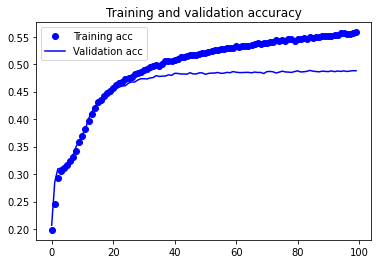

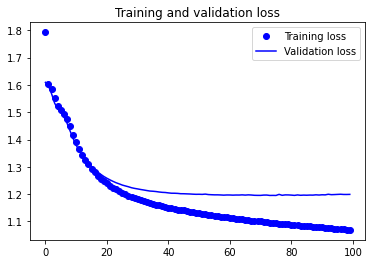

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores.
acc = history10.history['acc']
val_acc = history10.history['val_acc']
loss = history10.history['loss']
val_loss = history10.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

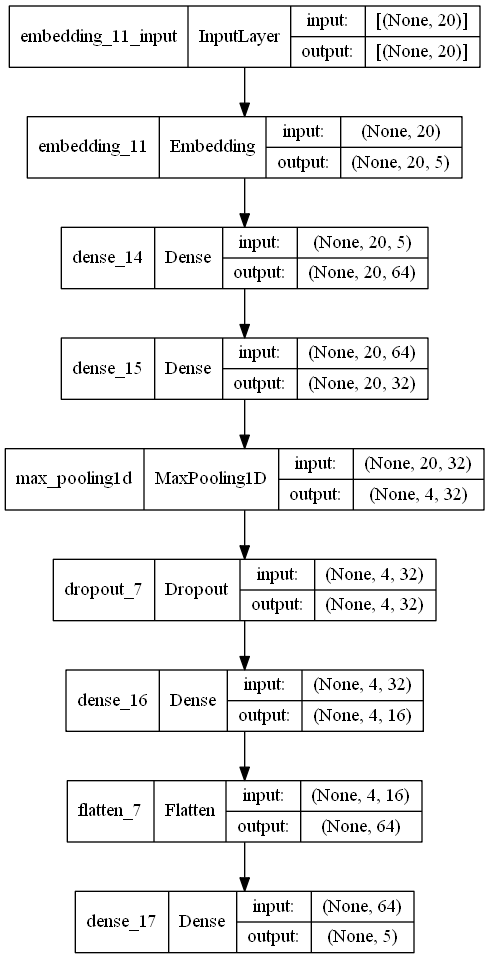

In [ ]:
# Converts a Keras model to dot format and save to a file.
plot_model(model10, show_shapes = True, to_file='model10.png')

In [ ]:
# Save the Model.
model10.save('text_model_10.h5')

### Model #11: Embedding + Combining 1D Convnets + LSTM With Dropout, Recurrent Dropout + MaxPooling1D  Layers

Let try the strategy to combine the speed and lightness of convnets with the order-sensitivity
of RNNs by using a 1D convnet as a preprocessing step before an RNN such as LSTM.

In [ ]:
# Build the model.
model11 = Sequential()
model11.add(Embedding(max_words, embedding_dim, input_length=maxlen)) # Receive word embedding as input
model11.add(layers.Conv1D(32, 8, activation='relu')) # 1D convnets layer - Window size of 8
model11.add(layers.MaxPooling1D(5)) # MaxPooling1D layer
model11.add(layers.LSTM(32, dropout=0.1, recurrent_dropout=0.5)) # LSTM, dropout, recurrent dropout layer

# Add the classifier on top.
model11.add(Dense(5, activation='softmax')) # Output dense layer.

# Print a useful summary of the model & check total and trainable params.
model11.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 20, 5)             75000     
                                                                 
 conv1d (Conv1D)             (None, 13, 32)            1312      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 2, 32)            0         
 1D)                                                             
                                                                 
 lstm_7 (LSTM)               (None, 32)                8320      
                                                                 
 dense_18 (Dense)            (None, 5)                 165       
                                                                 
Total params: 84,797
Trainable params: 84,797
Non-trainable params: 0
_________________________________________________

In [ ]:
# Let compile the model using RMSprop as optimizer with learning rate of 0.0001.
model11.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
# Train the model on GPU & record its total time in second.
with tf.device('/device:GPU:0'):
    start = time.time()
    history11 = model11.fit(X_train, y_train,
                        epochs=epoch,
                        batch_size=epochs_size,
                        validation_data= (X_test, y_test))
    print("Total time: ", time.time() - start, "seconds")

Epoch 1/100
440/440 [==============================] - 5s 7ms/step - loss: 1.6029 - acc: 0.2829 - val_loss: 1.5889 - val_acc: 0.3043
Epoch 2/100
440/440 [==============================] - 2s 4ms/step - loss: 1.5536 - acc: 0.3077 - val_loss: 1.5156 - val_acc: 0.3083
Epoch 3/100
440/440 [==============================] - 2s 4ms/step - loss: 1.5022 - acc: 0.3133 - val_loss: 1.4890 - val_acc: 0.3193
Epoch 4/100
440/440 [==============================] - 2s 4ms/step - loss: 1.4779 - acc: 0.3252 - val_loss: 1.4654 - val_acc: 0.3295
Epoch 5/100
440/440 [==============================] - 2s 4ms/step - loss: 1.4514 - acc: 0.3401 - val_loss: 1.4397 - val_acc: 0.3418
Epoch 6/100
440/440 [==============================] - 2s 4ms/step - loss: 1.4221 - acc: 0.3560 - val_loss: 1.4142 - val_acc: 0.3704
Epoch 7/100
440/440 [==============================] - 2s 4ms/step - loss: 1.3994 - acc: 0.3727 - val_loss: 1.3983 - val_acc: 0.3850
Epoch 8/100
440/440 [==============================] - 2s 4ms/step - 

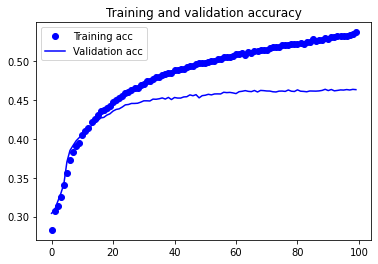

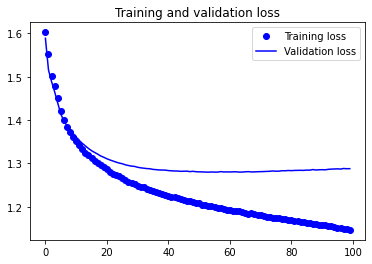

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores.
acc = history11.history['acc']
val_acc = history11.history['val_acc']
loss = history11.history['loss']
val_loss = history11.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

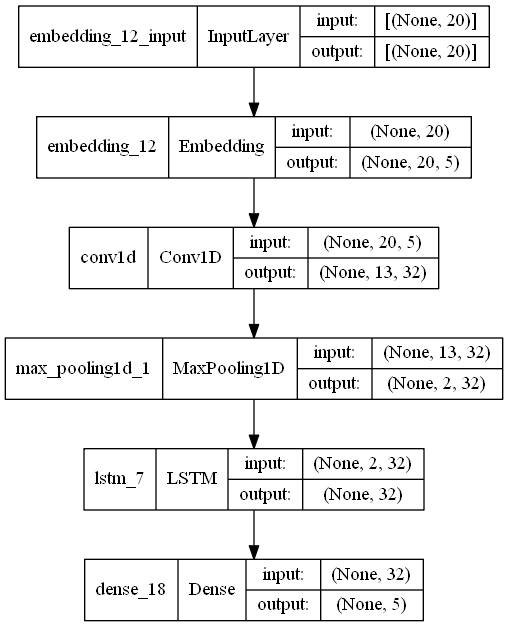

In [ ]:
# Converts a Keras model to dot format and save to a file.
plot_model(model11, show_shapes = True, to_file='model11.png')

In [ ]:
# Save the Model.
model11.save('text_model_11.h5')

### Model #11A: Embedding + Combining 1D Convnets + AveragePooling1D + LSTM With Dropout,  Recurrent Dropout Layers

Let try the strategy to combine the speed and lightness of convnets with the order-sensitivity
of RNNs by using a 1D convnet as a preprocessing step before an RNN such as LSTM.

In [ ]:
# Build the model.
model11A = Sequential()
model11A.add(Embedding(max_words, embedding_dim, input_length=maxlen)) # Receive word embedding as input
model11A.add(layers.Conv1D(32, 8, activation='relu')) # 1D convnets layer - Window size of 8
model11A.add(layers.AveragePooling1D(10)) # AveragePooling 1D layer
model11A.add(layers.LSTM(32, dropout=0.1, recurrent_dropout=0.5)) # LSTM, dropout, recurrent dropout layer

# Add the classifier on top.
model11A.add(Dense(5, activation='softmax')) # Output dense layer.

# Print a useful summary of the model & check total and trainable params.
model11A.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 20, 5)             75000     
                                                                 
 conv1d_1 (Conv1D)           (None, 13, 32)            1312      
                                                                 
 average_pooling1d (AverageP  (None, 1, 32)            0         
 ooling1D)                                                       
                                                                 
 lstm_8 (LSTM)               (None, 32)                8320      
                                                                 
 dense_19 (Dense)            (None, 5)                 165       
                                                                 
Total params: 84,797
Trainable params: 84,797
Non-trainable params: 0
_________________________________________________

In [ ]:
# Let compile the model using RMSprop as optimizer with learning rate of 0.0001.
model11A.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
# Train the model on GPU & record its total time in second.
with tf.device('/device:GPU:0'):
    start = time.time()
    history11A = model11A.fit(X_train, y_train,
                        epochs=epoch,
                        batch_size=epochs_size,
                        validation_data= (X_test, y_test))
    print("Total time: ", time.time() - start, "seconds")

Epoch 1/100
440/440 [==============================] - 4s 4ms/step - loss: 1.6048 - acc: 0.2937 - val_loss: 1.5940 - val_acc: 0.3064ss: 1.6074 - ac
Epoch 2/100
440/440 [==============================] - 1s 3ms/step - loss: 1.5640 - acc: 0.3079 - val_loss: 1.5273 - val_acc: 0.3080
Epoch 3/100
440/440 [==============================] - 1s 3ms/step - loss: 1.5111 - acc: 0.3095 - val_loss: 1.4993 - val_acc: 0.3116
Epoch 4/100
440/440 [==============================] - 1s 3ms/step - loss: 1.4920 - acc: 0.3159 - val_loss: 1.4833 - val_acc: 0.3184
Epoch 5/100
440/440 [==============================] - 1s 3ms/step - loss: 1.4760 - acc: 0.3241 - val_loss: 1.4682 - val_acc: 0.3249
Epoch 6/100
440/440 [==============================] - 1s 3ms/step - loss: 1.4605 - acc: 0.3311 - val_loss: 1.4544 - val_acc: 0.3298
Epoch 7/100
440/440 [==============================] - 1s 3ms/step - loss: 1.4448 - acc: 0.3379 - val_loss: 1.4400 - val_acc: 0.3298
Epoch 8/100
440/440 [==============================] -

Epoch 62/100
440/440 [==============================] - 1s 3ms/step - loss: 1.2173 - acc: 0.4948 - val_loss: 1.2878 - val_acc: 0.4529
Epoch 63/100
440/440 [==============================] - 1s 3ms/step - loss: 1.2170 - acc: 0.4941 - val_loss: 1.2877 - val_acc: 0.4527
Epoch 64/100
440/440 [==============================] - 1s 3ms/step - loss: 1.2148 - acc: 0.4951 - val_loss: 1.2883 - val_acc: 0.4504
Epoch 65/100
440/440 [==============================] - 1s 3ms/step - loss: 1.2142 - acc: 0.4947 - val_loss: 1.2885 - val_acc: 0.4496
Epoch 66/100
440/440 [==============================] - 1s 3ms/step - loss: 1.2134 - acc: 0.4966 - val_loss: 1.2873 - val_acc: 0.44990s - loss: 1.2123 - acc: 0. - ETA: 0s - loss: 1.2123 -
Epoch 67/100
440/440 [==============================] - 1s 3ms/step - loss: 1.2123 - acc: 0.4975 - val_loss: 1.2871 - val_acc: 0.4520
Epoch 68/100
440/440 [==============================] - 1s 3ms/step - loss: 1.2122 - acc: 0.4984 - val_loss: 1.2873 - val_acc: 0.4505
Epoch 69

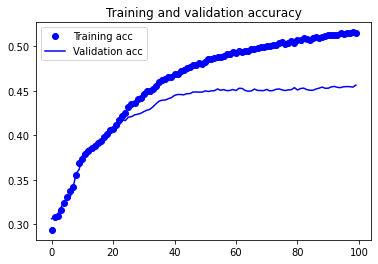

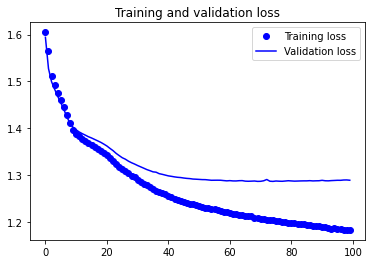

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores.
acc = history11A.history['acc']
val_acc = history11A.history['val_acc']
loss = history11A.history['loss']
val_loss = history11A.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

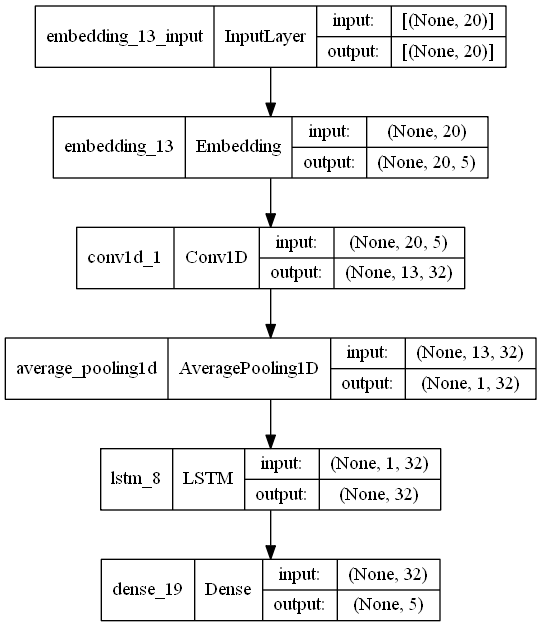

In [ ]:
# Converts a Keras model to dot format and save to a file.
plot_model(model11A, show_shapes = True, to_file='model11A.png')

In [ ]:
# Save the Model.
model11A.save('text_model_11A.h5')

### Model #12: Embedding + Combining 1D Convnets + MaxPooling1D + GRU With Dropout, Recurrent Dropout Layers

Let try the strategy to combine the speed and lightness of convnets with the order-sensitivity
of RNNs by using a 1D convnet as a preprocessing step before an RNN such as GRU.

In [ ]:
# Build the model.
model12 = Sequential()
model12.add(Embedding(max_words, embedding_dim, input_length=maxlen)) # Receive word embedding as input
model12.add(layers.Conv1D(32, 9, activation='softmax')) # 1D convnets layer - Window size of 9
model12.add(layers.MaxPooling1D(5)) # MaxPooling1D layer
model12.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5)) # GRU, dropout, recurrent dropout layer

# Add the classifier on top.
model12.add(Dense(5, activation='softmax')) # Output dense layer.

# Print a useful summary of the model & check total and trainable params.
model12.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 20, 5)             75000     
                                                                 
 conv1d_1 (Conv1D)           (None, 12, 32)            1472      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 2, 32)            0         
 1D)                                                             
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dense_9 (Dense)             (None, 5)                 165       
                                                                 
Total params: 82,973
Trainable params: 82,973
Non-trainable params: 0
__________________________________________________

In [ ]:
# Let compile the model using RMSprop as optimizer with learning rate of 0.0001.
model12.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
# Train the model on GPU & record its total time in second.
with tf.device('/device:GPU:0'):
    start = time.time()
    history12 = model12.fit(X_train, y_train,
                        epochs=epoch,
                        batch_size=epochs_size,
                        validation_data= (X_test, y_test))
    print("Total time: ", time.time() - start, "seconds")

Epoch 1/100
440/440 [==============================] - 5s 5ms/step - loss: 1.6091 - acc: 0.2050 - val_loss: 1.6083 - val_acc: 0.2007
Epoch 2/100
440/440 [==============================] - 2s 4ms/step - loss: 1.6062 - acc: 0.2688 - val_loss: 1.6025 - val_acc: 0.2983
Epoch 3/100
440/440 [==============================] - 2s 4ms/step - loss: 1.5938 - acc: 0.2975 - val_loss: 1.5806 - val_acc: 0.2980
Epoch 4/100
440/440 [==============================] - 2s 4ms/step - loss: 1.5605 - acc: 0.2978 - val_loss: 1.5384 - val_acc: 0.2975
Epoch 5/100
440/440 [==============================] - 2s 5ms/step - loss: 1.5244 - acc: 0.2992 - val_loss: 1.5138 - val_acc: 0.3004
Epoch 6/100
440/440 [==============================] - 1s 3ms/step - loss: 1.5092 - acc: 0.3033 - val_loss: 1.5040 - val_acc: 0.3129
Epoch 7/100
440/440 [==============================] - 2s 4ms/step - loss: 1.5002 - acc: 0.3132 - val_loss: 1.4957 - val_acc: 0.3169
Epoch 8/100
440/440 [==============================] - 2s 6ms/step - 

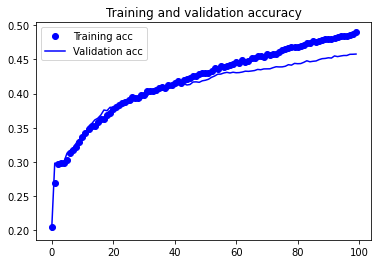

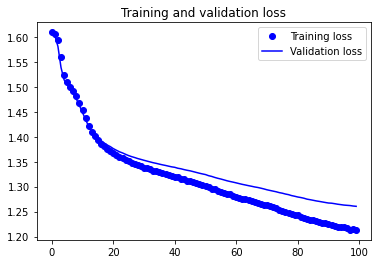

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores.
acc = history12.history['acc']
val_acc = history12.history['val_acc']
loss = history12.history['loss']
val_loss = history12.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

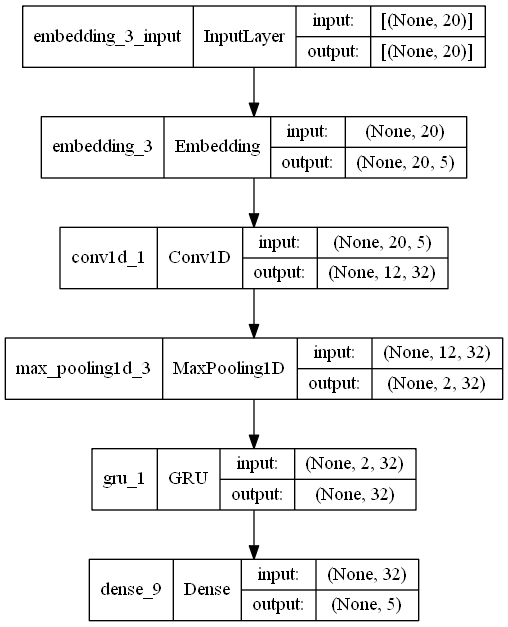

In [ ]:
# Converts a Keras model to dot format and save to a file.
plot_model(model12, show_shapes = True, to_file='model12.png')

In [ ]:
# Save the Model.
model12.save('text_model_12.h5')

## Step 3 – Evaluate the Modesl using Testing Data

###  Evaluate Baseline Model #1: Embedding + Flatten + Dense Layers

In [ ]:
# Model #1 (replicate where necessary for other models).
model1.load_weights('text_model_1.h5')

# This is what the saved model looks like:
model1.summary()

# Evaluate the model using testing data.
model1.evaluate(X_test, y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 5)             75000     
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 5)                 505       
                                                                 
Total params: 75,505
Trainable params: 75,505
Non-trainable params: 0
_________________________________________________________________
344/344 [==============================] - 1s 1ms/step - loss: 1.4449 - acc: 0.4797A: 0s - loss: 1.4436 - acc: 0.480


[1.444930076599121, 0.47972726821899414]

###  Evaluate Model #2: Pre-Trained GloVe Word Embeddings (Freeze Pre-Trained Embedding Layer)

In [ ]:
# Model #2 (replicate where necessary for other models).
model2.load_weights('text_model_2.h5')

# This is what the saved model looks like:
model2.summary()

# Evaluate the model using testing data.
model2.evaluate(X_test, y_test)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 50)            750000    
                                                                 
 flatten_1 (Flatten)         (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 5)                 5005      
                                                                 
Total params: 755,005
Trainable params: 5,005
Non-trainable params: 750,000
_________________________________________________________________
344/344 [==============================] - 1s 1ms/step - loss: 1.3499 - acc: 0.4163


[1.3498878479003906, 0.41627272963523865]

###  Evaluate Model #3: Pre-Trained GloVe Word Embeddings (Unfreeze Pre-Trained Embedding Layer)

In [ ]:
# Model #3 (replicate where necessary for other models).
model3.load_weights('text_model_3.h5')

# This is what the saved model looks like:
model3.summary()

# Evaluate the model using testing data.
model3.evaluate(X_test, y_test)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 50)            750000    
                                                                 
 flatten_2 (Flatten)         (None, 1000)              0         
                                                                 
 dense_2 (Dense)             (None, 5)                 5005      
                                                                 
Total params: 755,005
Trainable params: 755,005
Non-trainable params: 0
_________________________________________________________________
344/344 [==============================] - 1s 1ms/step - loss: 1.2476 - acc: 0.4901


[1.2475559711456299, 0.49009090662002563]

###  Evaluate Model #4: Pre-Trained GloVe Word Embeddings (Unfreeze Pre-Trained Embedding Layer) + LSTM + Regularization + Dropout + Flatten + Dense Layers

In [ ]:
# Model #4 (replicate where necessary for other models).
model4.load_weights('text_model_4.h5')

# This is what the saved model looks like:
model4.summary()

# Evaluate the model using testing data.
model4.evaluate(X_test, y_test)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 20, 50)            750000    
                                                                 
 lstm (LSTM)                 (None, 20, 300)           421200    
                                                                 
 dropout (Dropout)           (None, 20, 300)           0         
                                                                 
 lstm_1 (LSTM)               (None, 150)               270600    
                                                                 
 flatten_3 (Flatten)         (None, 150)               0         
                                                                 
 dense_3 (Dense)             (None, 5)                 755       
                                                                 
Total params: 1,442,555
Trainable params: 1,442,555
No

[1.3990100622177124, 0.4901818037033081]

###  Evaluate Model #5:  Embedding + SimpleRNN + Dense + Regularization + Dropout Layers

In [ ]:
# Model #5 (replicate where necessary for other models).
model5.load_weights('text_model_5.h5')

# This is what the saved model looks like:
model5.summary()

# Evaluate the model using testing data.
model5.evaluate(X_test, y_test)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 20, 5)             75000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 20, 32)            1216      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dropout_2 (Dropout)         (None, 32)               

[1.2800889015197754, 0.48609089851379395]

###  Evaluate Model #6: Embedding + Long Short-Term Memory (LSTM) + Dense + Regularization Dropout Layers

In [ ]:
# Model #6 (replicate where necessary for other models).
model6.load_weights('text_model_6.h5')

# This is what the saved model looks like:
model6.summary()

# Evaluate the model using testing data.
model6.evaluate(X_test, y_test)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 20, 5)             75000     
                                                                 
 lstm_2 (LSTM)               (None, 20, 128)           68608     
                                                                 
 dense_7 (Dense)             (None, 20, 32)            4128      
                                                                 
 dropout_3 (Dropout)         (None, 20, 32)            0         
                                                                 
 dropout_4 (Dropout)         (None, 20, 32)            0         
                                                                 
 flatten_4 (Flatten)         (None, 640)               0         
                                                                 
 dense_8 (Dense)             (None, 5)                

[1.1697297096252441, 0.5029090642929077]

###  Evaluate Model #6A: Embedding + Long Short-Term Memory (LSTM) + Dense Layers + Nadam As Optimizer

In [ ]:
# Model #6A (replicate where necessary for other models).
model6A.load_weights('text_model_6A.h5')

# This is what the saved model looks like:
model6A.summary()

# Evaluate the model using testing data.
model6A.evaluate(X_test, y_test)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 20, 5)             75000     
                                                                 
 lstm_3 (LSTM)               (None, 20, 128)           68608     
                                                                 
 flatten_5 (Flatten)         (None, 2560)              0         
                                                                 
 dense_9 (Dense)             (None, 5)                 12805     
                                                                 
Total params: 156,413
Trainable params: 156,413
Non-trainable params: 0
_________________________________________________________________
344/344 [==============================] - 2s 5ms/step - loss: 1.2087 - acc: 0.4950


[1.208709716796875, 0.4950000047683716]

###  Evaluate Model #6B: Long Short-Term Memory (LSTM) + Dropout + Recurrent Dropout + Embedding Layers + Adam Optimizer 

In [ ]:
# Model #6B (replicate where necessary for other models).
model6B.load_weights('text_model_6B.h5')

# This is what the saved model looks like:
model6B.summary()

# Evaluate the model using testing data.
model6B.evaluate(X_test, y_test)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 20, 5)             75000     
                                                                 
 lstm_4 (LSTM)               (None, 20, 128)           68608     
                                                                 
 flatten_6 (Flatten)         (None, 2560)              0         
                                                                 
 dense_10 (Dense)            (None, 5)                 12805     
                                                                 
Total params: 156,413
Trainable params: 156,413
Non-trainable params: 0
_________________________________________________________________
344/344 [==============================] - 2s 5ms/step - loss: 1.5235 - acc: 0.4779


[1.5234822034835815, 0.4779090881347656]

###  Evaluate Model #7: Long Short-Term Memory (LSTM) With Bidirectional + Dropout + Embedding Layers

In [ ]:
# Model #7 (replicate where necessary for other models).
model7.load_weights('text_model_7.h5')

# This is what the saved model looks like:
model7.summary()

# Evaluate the model using testing data.
model7.evaluate(X_test, y_test)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 20, 5)             75000     
                                                                 
 bidirectional (Bidirectiona  (None, 20, 64)           9728      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 5)                 325       
                                                                 
Total params: 109,885
Trainable params: 109,885
Non-tr

[1.224789023399353, 0.4987272620201111]

###  Evaluate Model #8: GRU (Gated Recurrent Units) + Dropout +Recurrent Dropout + Embedding Layers

In [ ]:
# Model #8 (replicate where necessary for other models).
model8.load_weights('text_model_8.h5')

# This is what the saved model looks like:
model8.summary()

# Evaluate the model using testing data.
model8.evaluate(X_test, y_test)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 20, 5)             75000     
                                                                 
 gru (GRU)                   (None, 20, 64)            13632     
                                                                 
 gru_1 (GRU)                 (None, 20, 32)            9408      
                                                                 
 gru_2 (GRU)                 (None, 16)                2400      
                                                                 
 dense_12 (Dense)            (None, 5)                 85        
                                                                 
Total params: 100,525
Trainable params: 100,525
Non-trainable params: 0
_________________________________________________________________
344/344 [==============================] - 4s 8m

[1.219415307044983, 0.48690909147262573]

###  Evaluate Model #9: Gated Recurrent Units (GRU) With Bidirectional + Dropout + Embedding Layers

In [ ]:
# Model #9 (replicate where necessary for other models).
model9.load_weights('text_model_9.h5')

# This is what the saved model looks like:
model9.summary()

# Evaluate the model using testing data.
model9.evaluate(X_test, y_test)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 20, 5)             75000     
                                                                 
 bidirectional_2 (Bidirectio  (None, 20, 64)           7488      
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               18816     
 nal)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 5)                 325       
                                                                 
Total params: 101,629
Trainable params: 101,629
Non-t

[1.19859778881073, 0.49509090185165405]

###  Evaluate Model #10: Embedding + Dense + MaxPooling1D + Dropout Layers

In [ ]:
# Model #10 (replicate where necessary for other models).
model10.load_weights('text_model_10.h5')

# This is what the saved model looks like:
model10.summary()

# Evaluate the model using testing data.
model10.evaluate(X_test, y_test)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 20, 5)             75000     
                                                                 
 dense_14 (Dense)            (None, 20, 64)            384       
                                                                 
 dense_15 (Dense)            (None, 20, 32)            2080      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 4, 32)            0         
 )                                                               
                                                                 
 dropout_7 (Dropout)         (None, 4, 32)             0         
                                                                 
 dense_16 (Dense)            (None, 4, 16)             528       
                                                     

[1.199218988418579, 0.4880000054836273]

###  Evaluate Model #11: Embedding + Combining 1D Convnets + LSTM With Dropout, Recurrent Dropout + MaxPooling1D Layers

In [ ]:
# Model #11 (replicate where necessary for other models).
model11.load_weights('text_model_11.h5')

# This is what the saved model looks like:
model11.summary()

# Evaluate the model using testing data.
model11.evaluate(X_test, y_test)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 20, 5)             75000     
                                                                 
 conv1d (Conv1D)             (None, 13, 32)            1312      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 2, 32)            0         
 1D)                                                             
                                                                 
 lstm_7 (LSTM)               (None, 32)                8320      
                                                                 
 dense_18 (Dense)            (None, 5)                 165       
                                                                 
Total params: 84,797
Trainable params: 84,797
Non-trainable params: 0
_________________________________________________

[1.2879384756088257, 0.4630908966064453]

###  Evaluate Model #11A: Embedding + Combining 1D Convnets + AveragePooling1D + LSTM With Dropout, Recurrent Dropout Layers

In [ ]:
# Model #11A (replicate where necessary for other models).
model11A.load_weights('text_model_11A.h5')

# This is what the saved model looks like:
model11A.summary()

# Evaluate the model using testing data.
model11A.evaluate(X_test, y_test)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 20, 5)             75000     
                                                                 
 conv1d_1 (Conv1D)           (None, 13, 32)            1312      
                                                                 
 average_pooling1d (AverageP  (None, 1, 32)            0         
 ooling1D)                                                       
                                                                 
 lstm_8 (LSTM)               (None, 32)                8320      
                                                                 
 dense_19 (Dense)            (None, 5)                 165       
                                                                 
Total params: 84,797
Trainable params: 84,797
Non-trainable params: 0
_________________________________________________

[1.2892744541168213, 0.4565454423427582]

###  Evaluate Model #12: Embedding + Combining 1D Convnets + MaxPooling1D + GRU With Dropout, Recurrent Dropout Layers

In [ ]:
# Model #12 (replicate where necessary for other models).
model12.load_weights('text_model_12.h5')

# This is what the saved model looks like:
model12.summary()

# Evaluate the model using testing data.
model12.evaluate(X_test, y_test)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 20, 5)             75000     
                                                                 
 conv1d_1 (Conv1D)           (None, 12, 32)            1472      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 2, 32)            0         
 1D)                                                             
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dense_9 (Dense)             (None, 5)                 165       
                                                                 
Total params: 82,973
Trainable params: 82,973
Non-trainable params: 0
__________________________________________________

[1.260617971420288, 0.4577272832393646]

## Step 4 – Use the Best Model to make prediction

In [ ]:
# Load the best model.
model12.load_weights('text_model_12.h5')

### Making the 1st Prediction: 5 Stars

In [ ]:
# Takes the user input.
text_input = np.array([input()]) 
# I like the app

I like the app


In [ ]:
# Convert the user input into numeric tensor.
sequences = tokenizer.texts_to_sequences(text_input)
padded = pad_sequences(sequences, maxlen=maxlen)

In [ ]:
# Show the model output using predict function.
print(model12.predict(padded))

[[0.04702641 0.04048689 0.07149117 0.23286733 0.6081282 ]]


### Making the 2nd Prediction: 1 Star

In [ ]:
# Takes the user input.
text_input = np.array([input()]) 
# I do not like the app

I do not like the app


In [ ]:
# Convert the user input into numeric tensor.
sequences = tokenizer.texts_to_sequences(text_input)
padded = pad_sequences(sequences, maxlen=maxlen)

In [ ]:
# Show the model output using predict function.
print(model12.predict(padded))

[[0.2864977  0.19187205 0.20069274 0.18737869 0.13355878]]


### Making the 3rd Prediction: 4 Stars

In [ ]:
# Takes the user input.
text_input = np.array([input()]) 
# I am just ok with the app

I am just ok with the app


In [ ]:
# Convert the user input into numeric tensor.
sequences = tokenizer.texts_to_sequences(text_input)
padded = pad_sequences(sequences, maxlen=maxlen)

In [ ]:
# Show the model output using predict function.
print(model12.predict(padded))

[[0.19896264 0.15472457 0.18996853 0.2413856  0.21495873]]


### Making the 4th Prediction: 2 Stars

In [ ]:
# Takes the user input.
text_input = np.array([input()]) 
# the subscription is too high need to reduce it further or I will not sign up

the subscription is too high need to reduce it further or I will not sign up


In [ ]:
# Convert the user input into numeric tensor.
sequences = tokenizer.texts_to_sequences(text_input)
padded = pad_sequences(sequences, maxlen=maxlen)

In [ ]:
# Show the model output using predict function.
print(model12.predict(padded))

[[0.16605528 0.37555203 0.33228686 0.11255596 0.01354988]]


### Making the 5th Prediction: 3 Stars

In [ ]:
# Takes the user input.
text_input = np.array([input()]) 
# Not really recommended yet because many people want more show to be added

Not really recommended yet because many people want more show to be added


In [ ]:
# Convert the user input into numeric tensor.
sequences = tokenizer.texts_to_sequences(text_input)
padded = pad_sequences(sequences, maxlen=maxlen)

In [ ]:
# Show the model output using predict function.
print(model12.predict(padded))

[[0.11076853 0.25659913 0.34557953 0.2424973  0.04455554]]
